In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import scipy
import torch
from torch.utils.data import DataLoader
import gc

os.chdir('..')

In [2]:
from data_processing.datasets import PigletDataset
from neuralnet.model import SpectraMLP
import config
#from config import *
from torch.utils.data import ConcatDataset
from utils import *
from data_processing import *
from data_processing.generate_dataset import *
from tqdm.auto import tqdm
from ray import tune

#os.environ["CUDA_VISIBLE_DEVICES"]="3,4"
os.environ["CUDA_VISIBLE_DEVICES"]="1,2"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

PATH:  /home/kevin/bll-piglets-helicoid


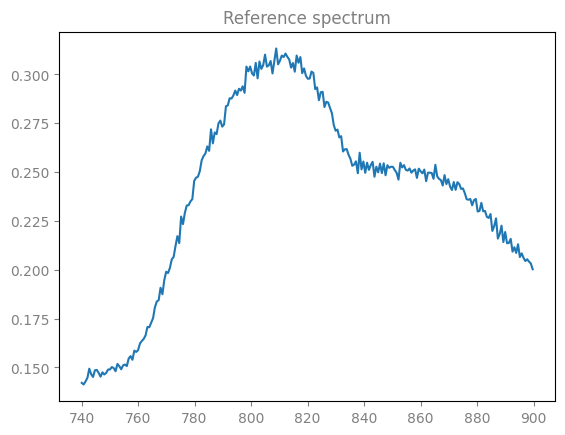

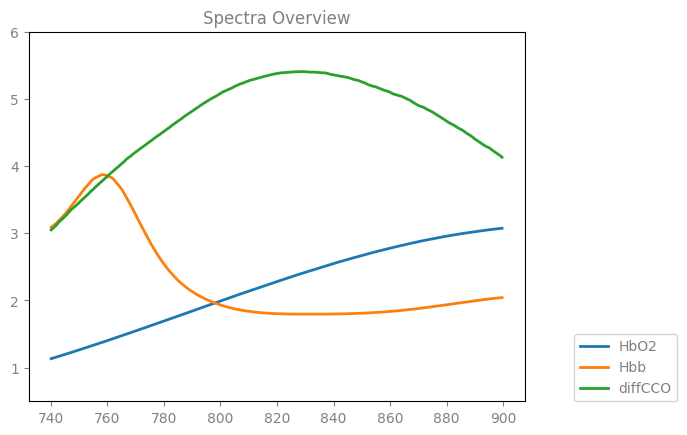

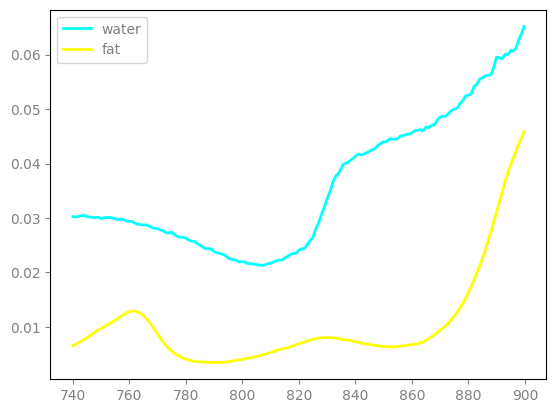

In [3]:
from config import *
img = scipy.io.loadmat('dataset/miniCYRIL Piglet Data/LWP498/LWP498_Ws_24Apr2017_15.mat')
img_darkcount = scipy.io.loadmat('dataset/miniCYRIL Piglet Data/LWP498/LWP498 _DarkCount_24Apr2017.mat')
img_whitecount = scipy.io.loadmat('dataset/miniCYRIL Piglet Data/LWP498/refSpectrum.mat')

wavelengths = img['wavelengths'].astype(float)
white_full = img_whitecount['refSpectrum'].astype(float)
dark_full = img_darkcount['DarkCount'].astype(float)
spectr = img['spectralDataAll'].astype(float)

concentrations_paper = img['AllConcentration']

idx = (wavelengths >= left_cut) & (wavelengths <= right_cut)
wavelengths = wavelengths[idx]
spectr = spectr[idx.squeeze()]
dark_full = dark_full[idx.squeeze()]
white_full = white_full[idx.squeeze()]

reference_index = 0
ref_spectr = (spectr[:, reference_index] - dark_full[:, 0]) / (white_full[:, 0] - dark_full[:, 0])

plt.figure()
plt.plot(wavelengths, ref_spectr)
plt.title("Reference spectrum")

molecules, x = preprocessing.read_molecules(left_cut, right_cut, wavelengths)
y_hbo2_f, y_hb_f, y_coxa, y_creda, y_water, y_fat, y_cytoa_diff, y_cytoc_oxy, y_cytoc_red, y_cytob_oxy, y_cytob_red = molecules

plt.figure()
coef = ["HbO2", "Hbb", "diffCCO"]
coef_list = [y_hbo2_f, y_hb_f, y_coxa-y_creda, y_cytoa_diff, y_cytoc_oxy, y_cytoc_red, y_cytob_oxy, y_cytob_red]
for i in range(len(coef)):
    plt.plot(wavelengths, coef_list[i], label=coef[i], linewidth=2)

plt.title("Spectra Overview")
plt.legend(loc=(1.1,0))
plt.ylim([0.5,6])

plt.figure()
colors = ['cyan', 'yellow']
coef = ["water", "fat"]
coef_list = [y_water, y_fat]
for i in range(len(coef)):
    plt.plot(wavelengths, coef_list[i], color=colors[i], label=coef[i], linewidth=2)
plt.legend()

# Optimization + NN Training + Test

In [4]:
# print(config.left_cut)
# print(config.right_cut)
# config.scattering_model = True
# print(config.scattering_model)
# print(config.train_on_synthetic)

In [5]:
#if config.scattering_model:
#config.scattering_model=True
generate_scattering_delta_attenuation_dataset(n_samples=200000)
#else:
generate_delta_attenuation_dataset(n_samples=200000)
#generate_diff_dataset(n_samples=1000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:10<00:00, 19395.18it/s]


Saving scattering model


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:03<00:00, 65435.33it/s]


Saving no scattering model


In [4]:
#config.scattering_model = False
#%run -i 'optimisation.py'
config.scattering_model = True
%run -i 'optimisation.py'

{'lwp475': 'LWP475_Ws_14Nov2016_1.mat', 'lwp478': 'LWP474_Ws_07Nov2016.mat', 'lwp479-HI+saline': 'LWP479_Ws_05Dec2016.mat', 'lwp494': 'LWP494_Ws_27Mar2017_17  21.mat', 'lwp499': 'LWP499_Ws_02_May_2017.mat', 'LWP480': 'LWP480_Ws_12Dec2016.mat', 'LWP481': 'LWP481_Ws_03Jan2017.mat', 'LWP484': 'LWP484_Ws_23Jan2017.mat', 'LWP485': 'LWP485_Ws_30Jan2017.mat', 'LWP489': 'LWP489_Ws_20Feb2017.mat', 'LWP488': 'LWP488_Ws_13Feb2017.mat', 'LWP490': 'LWP490_Ws_27Feb2017.mat', 'LWP491': 'ResultsLWP491_06Mar2017.mat', 'LWP492': 'LWP492_Ws_13Mar2017.mat', 'LWP495': 'LWP495_Ws_03Apr2017_14  23.mat', 'LWP498': 'LWP498_Ws_24Apr2017_15.mat', 'LWP500': 'LWP500_Ws_15_May_201716.mat', 'LWP501': 'LWP501_Ws_22_May_201715.mat', 'LWP502': 'LWP502_Ws_30_May_201716.mat', 'LWP503': 'LWP503_Ws_05_Jun_2017_15   8.mat', 'LWP504': 'LWP504_Ws_12Jun_2017_17   1.mat', 'LWP507': 'LWP507_Ws_10Jul_2017_16  55.mat', 'LWP509': 'LWP509_Ws_17Jul_2017_11  21.mat', 'LWP511': 'LWP511_Ws_25Jul_2017_16   2.mat', 'LWP512': 'LWP512_Ws_31

  0%|          | 0/25 [00:00<?, ?it/s]

lwp475 LWP475_Ws_14Nov2016_1.mat
(1024, 8806)
[[2377. 2351. 2358. ... 2355. 2355. 2355.]
 [2126. 2149. 2138. ... 2134. 2142. 2149.]
 [2465. 2469. 2507. ... 2446. 2461. 2465.]
 ...
 [2355. 2347. 2328. ... 2343. 2290. 2339.]
 [2419. 2435. 2461. ... 2389. 2415. 2412.]
 [2636. 2644. 2613. ... 2602. 2632. 2598.]]
(244, 107) (244, 10) (244,) (244, 8806)
Optimizing with scattering
[740.09042564 740.7554971  741.42050167 742.08543929 742.75030993
 743.41511355 744.07985011 744.74451956 745.40912187 746.073657
 746.7381249  747.40252554 748.06685887 748.73112485 749.39532344
 750.05945461 750.72351831 751.3875145  752.05144314 752.71530419
 753.37909761 754.04282336 754.7064814  755.37007169 756.03359418
 756.69704884 757.36043563 758.0237545  758.68700542 759.35018834
 760.01330323 760.67635004 761.33932873 762.00223926 762.6650816
 763.3278557  763.99056152 764.65319902 765.31576816 765.97826889
 766.64070119 767.303065   767.9653603  768.62758703 769.28974515
 769.95183463 770.61385543 771.2

Process ForkPoolWorker-5:
Process ForkPoolWorker-8:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:

KeyboardInterrupt



In [5]:
gc.collect()

127816659

# Train NN

2024-01-13 18:42:14,767	INFO worker.py:1673 -- Started a local Ray instance.
2024-01-13 18:42:15,845	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-01-13 18:42:15,849	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


2024-01-13 18:42:15,871	WARNING tune_controller.py:2189 -- The maximum number of pending trials has been automatically set to the number of available cluster CPUs, which is high (140 CPUs/pending trials). If you're running an experiment with a large number of trials, this could lead to scheduling overhead. In this case, consider setting the `TUNE_MAX_PENDING_TRIALS_PG` environment variable to the desired maximum number of concurrent trials.
2024-01-13 18:42:15,874	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:15,877	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:15,881	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:15,885	WAR

(pid=1331589) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:42:20,833	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1331643) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1331643)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 18:42:20,921	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:20,933	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:20,945	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please upda

(train_raytune_piglet pid=1331643) 1
(train_raytune_piglet pid=1331643) 43
(train_raytune_piglet pid=1331643) Training on synthetic: False
(train_raytune_piglet pid=1331643) Scattering model: False


2024-01-13 18:42:21,100	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:21,112	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:21,123	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:21,133	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:21,147	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:21,155	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please upda

(train_raytune_piglet pid=1331643) train set len 19000
(train_raytune_piglet pid=1331643) Total number of parameters: 10667
(train_raytune_piglet pid=1331643) None
(pid=1331614) PATH:  /home/kevin/bll-piglets-helicoid [repeated 39x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(train_raytune_piglet pid=1331614) 44 [repeated 78x across cluster]
(train_raytune_piglet pid=1331614) Training on synthetic: False [repeated 39x across cluster]
(train_raytune_piglet pid=1331614) Scattering model: False [repeated 39x across cluster]
(train_raytune_piglet pid=1331590) train set len 19000 [repeated 13x across cluster]
(train_raytune_piglet pid=1331643) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1331617) Total number of parameters: 5383 [repeated 11x across cluster]
(train_raytune_piglet pid=1331617) None [re

Trial name,loss
train_raytune_piglet_1749d_00000,3.11071e-07
train_raytune_piglet_1749d_00001,6.05052e-06
train_raytune_piglet_1749d_00002,2.15933e-05
train_raytune_piglet_1749d_00003,0.000550266
train_raytune_piglet_1749d_00004,1.53782e-06
train_raytune_piglet_1749d_00005,0.000567113
train_raytune_piglet_1749d_00006,6.48459e-07
train_raytune_piglet_1749d_00007,9.33619e-07
train_raytune_piglet_1749d_00008,0.000659655
train_raytune_piglet_1749d_00009,3.20307e-06


(train_raytune_piglet pid=1331643) Training complete in 0m 7s


2024-01-13 18:42:29,096	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1331622) train set len 19000 [repeated 26x across cluster]


2024-01-13 18:42:32,543	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1331604) 50% patience reached, decrease learning rate [repeated 4x across cluster]
(pid=1335353) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:42:33,222	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1335353) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 40x across cluster]
(train_raytune_piglet pid=1335353)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 40x across cluster]


(train_raytune_piglet pid=1335353) 0
(train_raytune_piglet pid=1335353) 0
(train_raytune_piglet pid=1335353) Training on synthetic: False
(train_raytune_piglet pid=1335353) Scattering model: False
(train_raytune_piglet pid=1331626) Total number of parameters: 8187 [repeated 28x across cluster]
(train_raytune_piglet pid=1331626) None [repeated 28x across cluster]
(train_raytune_piglet pid=1331617) Training complete in 0m 5s
(train_raytune_piglet pid=1331582) Training complete in 0m 10s


2024-01-13 18:42:37,042	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:42:37,204	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:42:37,267	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1335353) train set len 19000
(train_raytune_piglet pid=1331604) 50% patience reached, decrease learning rate [repeated 12x across cluster]
(pid=1335402) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1335402) train set len 19000
(train_raytune_piglet pid=1335402) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1335402) Training on synthetic: False
(train_raytune_piglet pid=1335402) Scattering model: False
(train_raytune_piglet pid=1335353) Total number of parameters: 735
(train_raytune_piglet pid=1335353) None


2024-01-13 18:42:38,722	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:42:38,805	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:42:39,661	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1335402) Total number of parameters: 735
(train_raytune_piglet pid=1335402) None
(pid=1335524) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:42:41,339	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:42:41,572	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:41,585	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1335487) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1335487)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1335487) Training on synthetic: False
(train_raytune_piglet pid=1335487) Scattering model: False


2024-01-13 18:42:42,225	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1331607) Training complete in 0m 14s [repeated 6x across cluster]


2024-01-13 18:42:42,451	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:42:42,630	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1331613) 50% patience reached, decrease learning rate [repeated 7x across cluster]


2024-01-13 18:42:43,276	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:43,290	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1335524) train set len 19000 [repeated 2x across cluster]
(train_raytune_piglet pid=1335609) 60 [repeated 8x across cluster]


2024-01-13 18:42:44,615	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:42:45,390	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:45,811	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1335609) Total number of parameters: 18543 [repeated 3x across cluster]
(train_raytune_piglet pid=1335609) None [repeated 3x across cluster]
(pid=1335766) PATH:  /home/kevin/bll-piglets-helicoid [repeated 5x across cluster]
(train_raytune_piglet pid=1335766) Training on synthetic: False [repeated 5x across cluster]
(train_raytune_piglet pid=1335766) Scattering model: False [repeated 5x across cluster]


2024-01-13 18:42:47,149	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1335856) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 6x across cluster]
(train_raytune_piglet pid=1335856)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 6x across cluster]
2024-01-13 18:42:47,269	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:42:47,353	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1331613) Training complete in 0m 18s [repeated 3x across cluster]


2024-01-13 18:42:47,992	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1331586) 50% patience reached, decrease learning rate [repeated 11x across cluster]
(train_raytune_piglet pid=1335855) train set len 19000 [repeated 7x across cluster]


2024-01-13 18:42:48,805	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:42:49,331	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1335855) 32 [repeated 10x across cluster]
(train_raytune_piglet pid=1335855) Total number of parameters: 7939 [repeated 6x across cluster]
(train_raytune_piglet pid=1335855) None [repeated 6x across cluster]
(pid=1336054) PATH:  /home/kevin/bll-piglets-helicoid [repeated 4x across cluster]
(train_raytune_piglet pid=1336054) Training on synthetic: False [repeated 4x across cluster]
(train_raytune_piglet pid=1336054) Scattering model: False [repeated 4x across cluster]


2024-01-13 18:42:52,384	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1336292) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1336292)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]


(train_raytune_piglet pid=1331603) Training complete in 0m 21s [repeated 2x across cluster]
(train_raytune_piglet pid=1331633) 50% patience reached, decrease learning rate [repeated 6x across cluster]


2024-01-13 18:42:53,373	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1336292) train set len 19000 [repeated 2x across cluster]


2024-01-13 18:42:53,799	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:42:54,892	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1336334) 15 [repeated 6x across cluster]


2024-01-13 18:42:55,264	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1336292) Total number of parameters: 12225 [repeated 3x across cluster]
(train_raytune_piglet pid=1336292) None [repeated 3x across cluster]
(pid=1336334) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1336334) Training on synthetic: False [repeated 2x across cluster]
(train_raytune_piglet pid=1336334) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1331614) Training complete in 0m 27s [repeated 3x across cluster]
(train_raytune_piglet pid=1335695) 50% patience reached, decrease learning rate [repeated 6x across cluster]


2024-01-13 18:42:58,259	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:42:58,347	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1336522) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1336522)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1336334) train set len 19000
(train_raytune_piglet pid=1336522) train set len 19000


2024-01-13 18:42:59,328	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:42:59,456	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1336564) 4 [repeated 4x across cluster]


2024-01-13 18:43:00,621	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1336564) Total number of parameters: 1015 [repeated 2x across cluster]
(train_raytune_piglet pid=1336564) None [repeated 2x across cluster]


2024-01-13 18:43:01,326	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:43:01,720	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1336610) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]


2024-01-13 18:43:02,339	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:43:02,585	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1336610) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1336610) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1335855) Training complete in 0m 14s [repeated 5x across cluster]
(train_raytune_piglet pid=1335487) 50% patience reached, decrease learning rate [repeated 10x across cluster]


2024-01-13 18:43:03,747	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1336763) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1336763)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]


(train_raytune_piglet pid=1336683) train set len 19000 [repeated 3x across cluster]


2024-01-13 18:43:04,745	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:43:05,503	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1336814) 14 [repeated 8x across cluster]
(train_raytune_piglet pid=1336763) Total number of parameters: 735 [repeated 3x across cluster]
(train_raytune_piglet pid=1336763) None [repeated 3x across cluster]


2024-01-13 18:43:06,599	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1336933) PATH:  /home/kevin/bll-piglets-helicoid [repeated 5x across cluster]


2024-01-13 18:43:07,589	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1336933) Training on synthetic: False [repeated 5x across cluster]
(train_raytune_piglet pid=1336933) Scattering model: False [repeated 5x across cluster]
(train_raytune_piglet pid=1336564) Training complete in 0m 7s [repeated 3x across cluster]
(train_raytune_piglet pid=1331596) 50% patience reached, decrease learning rate [repeated 9x across cluster]


2024-01-13 18:43:08,858	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1336933) train set len 19000 [repeated 4x across cluster]


(train_raytune_piglet pid=1337057) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1337057)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]
2024-01-13 18:43:09,616	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:43:09,753	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:43:09,778	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:43:09,875	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to t

(train_raytune_piglet pid=1337057) 1 [repeated 6x across cluster]
(train_raytune_piglet pid=1337057) Total number of parameters: 253 [repeated 4x across cluster]
(train_raytune_piglet pid=1337057) None [repeated 4x across cluster]
(pid=1337264) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]


2024-01-13 18:43:12,446	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:43:12,650	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1337264) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1337264) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1335856) Training complete in 0m 25s [repeated 8x across cluster]
(train_raytune_piglet pid=1331598) 50% patience reached, decrease learning rate [repeated 4x across cluster]
(train_raytune_piglet pid=1337264) train set len 19000 [repeated 3x across cluster]


(train_raytune_piglet pid=1337355) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 6x across cluster]
(train_raytune_piglet pid=1337355)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 6x across cluster]


(train_raytune_piglet pid=1337356) 19 [repeated 14x across cluster]
(train_raytune_piglet pid=1337356) Total number of parameters: 4715 [repeated 6x across cluster]
(train_raytune_piglet pid=1337356) None [repeated 6x across cluster]
(pid=1337627) PATH:  /home/kevin/bll-piglets-helicoid [repeated 6x across cluster]
(train_raytune_piglet pid=1337627) Training on synthetic: False [repeated 6x across cluster]
(train_raytune_piglet pid=1337627) Scattering model: False [repeated 6x across cluster]


2024-01-13 18:43:18,472	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1336814) Training complete in 0m 12s
(train_raytune_piglet pid=1336894) 50% patience reached, decrease learning rate [repeated 9x across cluster]


2024-01-13 18:43:19,011	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1337716) train set len 19000 [repeated 8x across cluster]


2024-01-13 18:43:20,320	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:43:20,772	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:43:21,402	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1337716) 36 [repeated 6x across cluster]
(train_raytune_piglet pid=1337716) Total number of parameters: 10263 [repeated 4x across cluster]
(train_raytune_piglet pid=1337716) None [repeated 4x across cluster]
(pid=1337716) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1337716) Training on synthetic: False [repeated 2x across cluster]
(train_raytune_piglet pid=1337716) Scattering model: False [repeated 2x across cluster]


(train_raytune_piglet pid=1338088) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 5x across cluster]
(train_raytune_piglet pid=1338088)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 5x across cluster]


(train_raytune_piglet pid=1337358) Training complete in 0m 6s [repeated 4x across cluster]


2024-01-13 18:43:24,194	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1337355) 50% patience reached, decrease learning rate [repeated 4x across cluster]
(train_raytune_piglet pid=1338087) train set len 19000 [repeated 2x across cluster]
(train_raytune_piglet pid=1338187) 7 [repeated 8x across cluster]
(train_raytune_piglet pid=1338187) Total number of parameters: 1739 [repeated 4x across cluster]
(train_raytune_piglet pid=1338187) None [repeated 4x across cluster]
(pid=1338279) PATH:  /home/kevin/bll-piglets-helicoid [repeated 5x across cluster]
(train_raytune_piglet pid=1338279) Training on synthetic: False [repeated 5x across cluster]
(train_raytune_piglet pid=1338279) Scattering model: False [repeated 5x across cluster]
(train_raytune_piglet pid=1331602) Training complete in 0m 59s
(train_raytune_piglet pid=1337057) 50% patience reached, decrease learning rate [repeated 10x across cluster]


(train_raytune_piglet pid=1338402) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 5x across cluster]
(train_raytune_piglet pid=1338402)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 5x across cluster]
2024-01-13 18:43:29,973	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1337264) Training complete in 0m 17s
(train_raytune_piglet pid=1338279) train set len 19000 [repeated 3x across cluster]
(train_raytune_piglet pid=1338402) 11 [repeated 4x across cluster]
(train_raytune_piglet pid=1338402) Total number of parameters: 2863 [repeated 2x across cluster]
(train_raytune_piglet pid=1338402) None [repeated 2x across cluster]
(pid=1338402) PATH:  /home/kevin/bll-piglets-helicoid
(pid=1338612) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1338402) Training on synthetic: False
(train_raytune_piglet pid=1338402) Scattering model: False


2024-01-13 18:43:34,260	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1338612) Training on synthetic: False
(train_raytune_piglet pid=1338612) Scattering model: False
(train_raytune_piglet pid=1336763) 50% patience reached, decrease learning rate [repeated 7x across cluster]


(train_raytune_piglet pid=1338612) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1338612)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 18:43:34,983	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1336763) Training complete in 0m 31s [repeated 3x across cluster]
(train_raytune_piglet pid=1338402) train set len 19000
(train_raytune_piglet pid=1338612) train set len 19000


2024-01-13 18:43:35,201	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:43:36,607	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1338612) 38 [repeated 2x across cluster]

2024-01-13 18:43:37,438	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


2024-01-13 18:43:37,749	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1338612) Total number of parameters: 9427
(train_raytune_piglet pid=1338612) None


2024-01-13 18:43:39,162	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1338716) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]


(train_raytune_piglet pid=1338714) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1338714)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1338716) Training on synthetic: False [repeated 2x across cluster]
(train_raytune_piglet pid=1338716) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1338279) 50% patience reached, decrease learning rate [repeated 9x across cluster]
(train_raytune_piglet pid=1338716) Total number of parameters: 995
(train_raytune_piglet pid=1338716) None
(train_raytune_piglet pid=1335766) Training complete in 0m 53s [repeated 4x across cluster]
(train_raytune_piglet pid=1338716) train set len 19000 [repeated 2x across cluster]


2024-01-13 18:43:40,691	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:43:41,047	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:43:41,129	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1338803) 24 [repeated 8x across cluster]
(pid=1338888) PATH:  /home/kevin/bll-piglets-helicoid [repeated 5x across cluster]
(train_raytune_piglet pid=1339089) Training on synthetic: False [repeated 6x across cluster]
(train_raytune_piglet pid=1339089) Scattering model: False [repeated 6x across cluster]
(train_raytune_piglet pid=1331630) 50% patience reached, decrease learning rate [repeated 6x across cluster]


(train_raytune_piglet pid=1339089) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 7x across cluster]
(train_raytune_piglet pid=1339089)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 7x across cluster]
2024-01-13 18:43:45,855	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1338803) Total number of parameters: 6555 [repeated 5x across cluster]
(train_raytune_piglet pid=1338803) None [repeated 5x across cluster]
(train_raytune_piglet pid=1338279) Training complete in 0m 18s [repeated 4x across cluster]
(train_raytune_piglet pid=1338888) train set len 19000 [repeated 5x across cluster]


2024-01-13 18:43:47,838	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1339088) 0 [repeated 12x across cluster]


2024-01-13 18:43:48,511	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:43:48,641	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1339087) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]
(train_raytune_piglet pid=1339088) Training on synthetic: False [repeated 2x across cluster]
(train_raytune_piglet pid=1339088) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1338612) 50% patience reached, decrease learning rate [repeated 3x across cluster]


(train_raytune_piglet pid=1339522) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1339522)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1339088) Total number of parameters: 735 [repeated 4x across cluster]
(train_raytune_piglet pid=1339088) None [repeated 4x across cluster]
(train_raytune_piglet pid=1337057) Training complete in 0m 38s [repeated 3x across cluster]
(train_raytune_piglet pid=1339522) train set len 19000 [repeated 4x across cluster]


2024-01-13 18:43:52,257	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1339575) 36 [repeated 4x across cluster]
(pid=1339632) PATH:  /home/kevin/bll-piglets-helicoid [repeated 4x across cluster]
(train_raytune_piglet pid=1339632) Training on synthetic: False [repeated 4x across cluster]
(train_raytune_piglet pid=1339632) Scattering model: False [repeated 4x across cluster]
(train_raytune_piglet pid=1338402) 50% patience reached, decrease learning rate [repeated 7x across cluster]


2024-01-13 18:43:55,736	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1339632) Total number of parameters: 735 [repeated 4x across cluster]
(train_raytune_piglet pid=1339632) None [repeated 4x across cluster]
(train_raytune_piglet pid=1331630) Training complete in 1m 32s [repeated 3x across cluster]
(train_raytune_piglet pid=1339632) train set len 19000 [repeated 3x across cluster]


2024-01-13 18:43:57,047	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
(train_raytune_piglet pid=1339806) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1339806)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]


(train_raytune_piglet pid=1339806) 62 [repeated 6x across cluster]


2024-01-13 18:43:58,466	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:43:59,542	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:43:59,639	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1339806) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:43:59,865	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1339928) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1339928) Training on synthetic: False [repeated 2x across cluster]
(train_raytune_piglet pid=1339928) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1339088) 50% patience reached, decrease learning rate [repeated 10x across cluster]


2024-01-13 18:44:01,680	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:44:02,248	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1339806) Total number of parameters: 15379
(train_raytune_piglet pid=1339806) None
(train_raytune_piglet pid=1338612) Training complete in 0m 27s [repeated 6x across cluster]
(train_raytune_piglet pid=1339928) train set len 19000 [repeated 2x across cluster]


2024-01-13 18:44:03,405	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1340012) 3 [repeated 4x across cluster]


2024-01-13 18:44:03,562	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1340012) Total number of parameters: 747
(train_raytune_piglet pid=1340012) None


2024-01-13 18:44:04,017	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:44:04,104	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
(train_raytune_piglet pid=1340066) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1340066)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(pid=1340068) PATH:  /home/kevin/bll-piglets-helicoid [repeated 5x across cluster]
(train_raytune_piglet pid=1340068) Training on synthetic: False [repeated 5x across cluster]
(train_raytune_piglet pid=1340068) Scattering model: False [repeated 5x across cluster]
(train_raytune_piglet pid=1338888) 50% patience reached, decrease learning rate [repeated 7x across cluster]


2024-01-13 18:44:06,200	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:44:06,354	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1331589) Training complete in 1m 42s [repeated 6x across cluster]
(train_raytune_piglet pid=1340265) train set len 19000 [repeated 6x across cluster]


2024-01-13 18:44:08,180	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1340387) 31 [repeated 18x across cluster]


2024-01-13 18:44:08,754	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1340067) Total number of parameters: 12895 [repeated 5x across cluster]
(train_raytune_piglet pid=1340067) None [repeated 5x across cluster]


2024-01-13 18:44:09,473	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1340389) PATH:  /home/kevin/bll-piglets-helicoid [repeated 6x across cluster]
(train_raytune_piglet pid=1340389) Training on synthetic: False [repeated 6x across cluster]
(train_raytune_piglet pid=1340389) Scattering model: False [repeated 6x across cluster]
(train_raytune_piglet pid=1331629) 50% patience reached, decrease learning rate [repeated 5x across cluster]


2024-01-13 18:44:10,913	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
(train_raytune_piglet pid=1340745) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 10x across cluster]
(train_raytune_piglet pid=1340745)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 10x across cluster]


(train_raytune_piglet pid=1336292) Training complete in 1m 18s [repeated 4x across cluster]
(train_raytune_piglet pid=1340746) train set len 19000 [repeated 7x across cluster]
(train_raytune_piglet pid=1341019) 0 [repeated 10x across cluster]
(train_raytune_piglet pid=1340745) Total number of parameters: 12899 [repeated 8x across cluster]
(train_raytune_piglet pid=1340745) None [repeated 8x across cluster]


2024-01-13 18:44:14,773	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1341117) PATH:  /home/kevin/bll-piglets-helicoid [repeated 6x across cluster]
(train_raytune_piglet pid=1341117) Training on synthetic: False [repeated 6x across cluster]
(train_raytune_piglet pid=1341117) Scattering model: False [repeated 6x across cluster]
(train_raytune_piglet pid=1331625) 50% patience reached, decrease learning rate [repeated 6x across cluster]


2024-01-13 18:44:18,632	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1339087) Training complete in 0m 32s [repeated 2x across cluster]
(train_raytune_piglet pid=1341117) train set len 19000 [repeated 4x across cluster]
(train_raytune_piglet pid=1341117) 50 [repeated 4x across cluster]
(train_raytune_piglet pid=1341118) Total number of parameters: 12559 [repeated 4x across cluster]
(train_raytune_piglet pid=1341118) None [repeated 4x across cluster]


(train_raytune_piglet pid=1341378) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 6x across cluster]
(train_raytune_piglet pid=1341378)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 6x across cluster]
2024-01-13 18:44:19,581	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1341378) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1341378) Training on synthetic: False
(train_raytune_piglet pid=1341378) Scattering model: False
(train_raytune_piglet pid=1338804) 50% patience reached, decrease learning rate [repeated 5x across cluster]
(pid=1341514) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1341514) Training on synthetic: False
(train_raytune_piglet pid=1341514) Scattering model: False
(train_raytune_piglet pid=1335402) Training complete in 1m 41s
(train_raytune_piglet pid=1341378) train set len 19000
(train_raytune_piglet pid=1341514) train set len 19000
(train_raytune_piglet pid=1341514) 0 [repeated 4x across cluster]
(train_raytune_piglet pid=1341378) Total number of parameters: 3963
(train_raytune_piglet pid=1341378) None
(train_raytune_piglet pid=1341514) Total number of parameters: 735
(train_raytune_piglet pid=1341514) None


2024-01-13 18:44:25,363	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
(train_raytune_piglet pid=1341603) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1341603)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1340067) Training complete in 0m 20s
(train_raytune_piglet pid=1337216) 50% patience reached, decrease learning rate [repeated 9x across cluster]
(pid=1341603) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:44:28,519	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1341603) Training on synthetic: False
(train_raytune_piglet pid=1341603) Scattering model: False
(train_raytune_piglet pid=1341603) train set len 19000
(train_raytune_piglet pid=1341603) 1 [repeated 2x across cluster]
(train_raytune_piglet pid=1341603) Total number of parameters: 251
(train_raytune_piglet pid=1341603) None
(pid=1341737) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:44:30,039	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:44:30,354	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1341737) Training on synthetic: False
(train_raytune_piglet pid=1341737) Scattering model: False
(train_raytune_piglet pid=1341514) Training complete in 0m 6s [repeated 3x across cluster]
(train_raytune_piglet pid=1341737) train set len 19000


2024-01-13 18:44:31,284	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:44:32,037	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1341737) Total number of parameters: 7153
(train_raytune_piglet pid=1341737) None
(train_raytune_piglet pid=1341117) 50% patience reached, decrease learning rate [repeated 13x across cluster]


(train_raytune_piglet pid=1341782) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1341782)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1341782) 0 [repeated 4x across cluster]


2024-01-13 18:44:35,023	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1341868) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]
(train_raytune_piglet pid=1341868) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1341868) Scattering model: False [repeated 3x across cluster]


2024-01-13 18:44:36,149	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1341117) Training complete in 0m 20s [repeated 4x across cluster]
(train_raytune_piglet pid=1341868) train set len 19000 [repeated 3x across cluster]
(train_raytune_piglet pid=1341869) Total number of parameters: 15655 [repeated 2x across cluster]
(train_raytune_piglet pid=1341869) None [repeated 2x across cluster]


2024-01-13 18:44:37,694	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:44:38,047	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1340388) 50% patience reached, decrease learning rate [repeated 8x across cluster]


(train_raytune_piglet pid=1342108) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 5x across cluster]
(train_raytune_piglet pid=1342108)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 5x across cluster]
2024-01-13 18:44:39,691	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1342108) 38 [repeated 10x across cluster]
(pid=1342108) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]
(train_raytune_piglet pid=1342108) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1342108) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1338889) Training complete in 0m 56s [repeated 3x across cluster]
(train_raytune_piglet pid=1342108) train set len 19000 [repeated 3x across cluster]


2024-01-13 18:44:42,659	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1342264) Total number of parameters: 12155 [repeated 5x across cluster]
(train_raytune_piglet pid=1342264) None [repeated 5x across cluster]


2024-01-13 18:44:43,215	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1340389) 50% patience reached, decrease learning rate [repeated 6x across cluster]
(train_raytune_piglet pid=1342318) 1 [repeated 6x across cluster]


(train_raytune_piglet pid=1342440) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1342440)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]


(pid=1342440) PATH:  /home/kevin/bll-piglets-helicoid [repeated 4x across cluster]
(train_raytune_piglet pid=1342440) Training on synthetic: False [repeated 4x across cluster]
(train_raytune_piglet pid=1342440) Scattering model: False [repeated 4x across cluster]
(train_raytune_piglet pid=1340068) Training complete in 0m 38s [repeated 2x across cluster]
(train_raytune_piglet pid=1342440) train set len 19000 [repeated 4x across cluster]
(train_raytune_piglet pid=1342317) Total number of parameters: 19659 [repeated 2x across cluster]
(train_raytune_piglet pid=1342317) None [repeated 2x across cluster]


2024-01-13 18:44:48,297	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:44:49,040	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1341737) 50% patience reached, decrease learning rate [repeated 6x across cluster]


2024-01-13 18:44:50,243	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1342531) 49 [repeated 6x across cluster]
(pid=1342531) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1342531) Training on synthetic: False [repeated 2x across cluster]
(train_raytune_piglet pid=1342531) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1340388) Training complete in 0m 41s [repeated 3x across cluster]
(train_raytune_piglet pid=1342531) train set len 19000 [repeated 2x across cluster]
(train_raytune_piglet pid=1342440) Total number of parameters: 10667 [repeated 3x across cluster]
(train_raytune_piglet pid=1342440) None [repeated 3x across cluster]


(train_raytune_piglet pid=1342828) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1342828)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1340389) 50% patience reached, decrease learning rate [repeated 7x across cluster]
(train_raytune_piglet pid=1342916) 7 [repeated 6x across cluster]
(pid=1342916) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]
(train_raytune_piglet pid=1342916) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1342916) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1340387) Training complete in 0m 49s
(train_raytune_piglet pid=1342916) train set len 19000 [repeated 3x across cluster]
(train_raytune_piglet pid=1342916) Total number of parameters: 1795 [repeated 3x across cluster]
(train_raytune_piglet pid=1342916) None [repeated 3x across cluster]


2024-01-13 18:44:58,080	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:44:58,367	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1341378) Training complete in 0m 38s


2024-01-13 18:44:58,809	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:44:59,337	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1342108) 50% patience reached, decrease learning rate [repeated 5x across cluster]


2024-01-13 18:45:01,901	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1343094) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:45:01,978	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
(train_raytune_piglet pid=1343094) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1343094)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1343094) 0
(train_raytune_piglet pid=1343094) 0
(train_raytune_piglet pid=1343094) Training on synthetic: False
(train_raytune_piglet pid=1343094) Scattering model: False
(train_raytune_piglet pid=1343094) train set len 19000


2024-01-13 18:45:03,400	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1331581) Training complete in 2m 36s [repeated 5x across cluster]


2024-01-13 18:45:03,547	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:45:03,824	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1342317) 50% patience reached, decrease learning rate [repeated 8x across cluster]


2024-01-13 18:45:04,570	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1343146) train set len 19000
(train_raytune_piglet pid=1343094) Total number of parameters: 735
(train_raytune_piglet pid=1343094) None
(pid=1343271) PATH:  /home/kevin/bll-piglets-helicoid [repeated 5x across cluster]
(train_raytune_piglet pid=1343271) 0 [repeated 10x across cluster]
(train_raytune_piglet pid=1343271) Training on synthetic: False [repeated 5x across cluster]
(train_raytune_piglet pid=1343271) Scattering model: False [repeated 5x across cluster]


(train_raytune_piglet pid=1343428) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 6x across cluster]
(train_raytune_piglet pid=1343428)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 6x across cluster]
2024-01-13 18:45:08,352	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1342108) Training complete in 0m 28s [repeated 4x across cluster]


2024-01-13 18:45:09,333	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1342916) 50% patience reached, decrease learning rate [repeated 8x across cluster]
(train_raytune_piglet pid=1343429) train set len 19000 [repeated 7x across cluster]
(train_raytune_piglet pid=1343430) Total number of parameters: 735 [repeated 8x across cluster]
(train_raytune_piglet pid=1343430) None [repeated 8x across cluster]


2024-01-13 18:45:12,186	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1343696) PATH:  /home/kevin/bll-piglets-helicoid [repeated 4x across cluster]
(train_raytune_piglet pid=1343696) 40 [repeated 8x across cluster]
(train_raytune_piglet pid=1343696) Training on synthetic: False [repeated 4x across cluster]
(train_raytune_piglet pid=1343696) Scattering model: False [repeated 4x across cluster]


(train_raytune_piglet pid=1343864) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1343864)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]
2024-01-13 18:45:13,879	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1342531) Training complete in 0m 26s [repeated 3x across cluster]


2024-01-13 18:45:13,972	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1337216) 50% patience reached, decrease learning rate [repeated 6x across cluster]
(train_raytune_piglet pid=1343864) train set len 19000 [repeated 2x across cluster]
(train_raytune_piglet pid=1343864) Total number of parameters: 735 [repeated 2x across cluster]
(train_raytune_piglet pid=1343864) None [repeated 2x across cluster]


2024-01-13 18:45:16,859	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1344042) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]


2024-01-13 18:45:17,612	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1344042) 0 [repeated 6x across cluster]
(train_raytune_piglet pid=1344042) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1344042) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1338714) Training complete in 1m 37s [repeated 3x across cluster]


(train_raytune_piglet pid=1344136) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1344136)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1338804) 50% patience reached, decrease learning rate [repeated 5x across cluster]
(train_raytune_piglet pid=1344136) train set len 19000 [repeated 4x across cluster]


2024-01-13 18:45:20,707	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1344136) Total number of parameters: 735 [repeated 3x across cluster]
(train_raytune_piglet pid=1344136) None [repeated 3x across cluster]
(pid=1344250) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]
(train_raytune_piglet pid=1344250) 0 [repeated 6x across cluster]
(train_raytune_piglet pid=1344250) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1344250) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1331595) Training complete in 2m 54s
(train_raytune_piglet pid=1340064) 50% patience reached, decrease learning rate [repeated 9x across cluster]


(train_raytune_piglet pid=1344466) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1344466)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]


(train_raytune_piglet pid=1338804) Training complete in 1m 43s


2024-01-13 18:45:25,450	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1344466) train set len 19000 [repeated 3x across cluster]
(train_raytune_piglet pid=1344342) Total number of parameters: 12155 [repeated 3x across cluster]
(train_raytune_piglet pid=1344342) None [repeated 3x across cluster]


2024-01-13 18:45:27,330	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1344466) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]


2024-01-13 18:45:27,944	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1344466) 63 [repeated 4x across cluster]
(train_raytune_piglet pid=1344466) Training on synthetic: False [repeated 2x across cluster]
(train_raytune_piglet pid=1344466) Scattering model: False [repeated 2x across cluster]


2024-01-13 18:45:28,901	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:45:29,625	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1343271) 50% patience reached, decrease learning rate [repeated 8x across cluster]


(train_raytune_piglet pid=1344611) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1344611)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1344342) Training complete in 0m 6s [repeated 4x across cluster]
(train_raytune_piglet pid=1344611) train set len 19000
(train_raytune_piglet pid=1344466) Total number of parameters: 15627
(train_raytune_piglet pid=1344466) None


2024-01-13 18:45:31,488	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:45:31,756	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
(train_raytune_piglet pid=1344660) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1344660)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 18:45:32,969	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1344661) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]
(train_raytune_piglet pid=1344661) train set len 19000
(train_raytune_piglet pid=1344661) 16 [repeated 6x across cluster]
(train_raytune_piglet pid=1344661) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1344661) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1344611) Total number of parameters: 13643
(train_raytune_piglet pid=1344611) None


2024-01-13 18:45:34,039	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1342440) 50% patience reached, decrease learning rate [repeated 8x across cluster]


2024-01-13 18:45:35,560	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1331599) Training complete in 3m 7s [repeated 5x across cluster]


2024-01-13 18:45:36,990	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1344866) PATH:  /home/kevin/bll-piglets-helicoid [repeated 4x across cluster]
(train_raytune_piglet pid=1344866) train set len 19000 [repeated 5x across cluster]


(train_raytune_piglet pid=1345028) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 6x across cluster]
(train_raytune_piglet pid=1345028)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 6x across cluster]


(train_raytune_piglet pid=1345028) 48 [repeated 10x across cluster]
(train_raytune_piglet pid=1345028) Training on synthetic: False [repeated 5x across cluster]
(train_raytune_piglet pid=1345028) Scattering model: False [repeated 5x across cluster]
(train_raytune_piglet pid=1344866) Total number of parameters: 735 [repeated 6x across cluster]
(train_raytune_piglet pid=1344866) None [repeated 6x across cluster]


2024-01-13 18:45:39,212	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:45:40,508	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1344135) 50% patience reached, decrease learning rate [repeated 6x across cluster]
(train_raytune_piglet pid=1342827) Training complete in 0m 46s [repeated 3x across cluster]


2024-01-13 18:45:42,990	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1345304) PATH:  /home/kevin/bll-piglets-helicoid [repeated 4x across cluster]
(train_raytune_piglet pid=1345304) train set len 19000 [repeated 4x across cluster]
(train_raytune_piglet pid=1345304) 28 [repeated 6x across cluster]
(train_raytune_piglet pid=1345304) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1345304) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1345304) Total number of parameters: 7759 [repeated 4x across cluster]
(train_raytune_piglet pid=1345304) None [repeated 4x across cluster]


(train_raytune_piglet pid=1345464) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1345464)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]
2024-01-13 18:45:44,838	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:45:45,153	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1343430) 50% patience reached, decrease learning rate [repeated 5x across cluster]


2024-01-13 18:45:46,639	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1331598) Training complete in 3m 18s [repeated 4x across cluster]
(pid=1345610) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]
(train_raytune_piglet pid=1345554) train set len 19000 [repeated 2x across cluster]
(train_raytune_piglet pid=1345610) 0 [repeated 6x across cluster]
(train_raytune_piglet pid=1345610) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1345610) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1345554) Total number of parameters: 735 [repeated 2x across cluster]
(train_raytune_piglet pid=1345554) None [repeated 2x across cluster]


2024-01-13 18:45:49,320	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:45:50,290	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
(train_raytune_piglet pid=1345736) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1345736)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1343428) 50% patience reached, decrease learning rate [repeated 11x across cluster]


2024-01-13 18:45:51,264	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:45:51,486	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1344744) Training complete in 0m 16s [repeated 4x across cluster]
(pid=1345824) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]


2024-01-13 18:45:53,483	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1345824) train set len 19000 [repeated 4x across cluster]
(train_raytune_piglet pid=1345824) 18 [repeated 6x across cluster]
(train_raytune_piglet pid=1345824) Training on synthetic: False [repeated 3x across cluster]
(train_raytune_piglet pid=1345824) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1345733) Total number of parameters: 3227 [repeated 3x across cluster]
(train_raytune_piglet pid=1345733) None [repeated 3x across cluster]
(train_raytune_piglet pid=1344136) 50% patience reached, decrease learning rate [repeated 10x across cluster]


2024-01-13 18:45:56,395	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
(train_raytune_piglet pid=1346037) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1346037)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]
2024-01-13 18:45:56,611	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1344867) Training complete in 0m 20s [repeated 3x across cluster]


2024-01-13 18:45:57,702	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1346232) PATH:  /home/kevin/bll-piglets-helicoid [repeated 5x across cluster]
(train_raytune_piglet pid=1346035) train set len 19000 [repeated 4x across cluster]


2024-01-13 18:45:58,986	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1346232) 37 [repeated 10x across cluster]
(train_raytune_piglet pid=1346232) Training on synthetic: False [repeated 5x across cluster]
(train_raytune_piglet pid=1346232) Scattering model: False [repeated 5x across cluster]
(train_raytune_piglet pid=1346035) Total number of parameters: 16365 [repeated 5x across cluster]
(train_raytune_piglet pid=1346035) None [repeated 5x across cluster]
(train_raytune_piglet pid=1341782) 50% patience reached, decrease learning rate [repeated 3x across cluster]


(train_raytune_piglet pid=1346402) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 5x across cluster]
(train_raytune_piglet pid=1346402)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 5x across cluster]
2024-01-13 18:46:01,764	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:46:01,988	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1338402) Training complete in 2m 32s [repeated 4x across cluster]
(pid=1346529) PATH:  /home/kevin/bll-piglets-helicoid [repeated 4x across cluster]
(train_raytune_piglet pid=1346528) train set len 19000 [repeated 4x across cluster]


2024-01-13 18:46:04,448	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1346529) 0 [repeated 8x across cluster]
(train_raytune_piglet pid=1346529) Training on synthetic: False [repeated 4x across cluster]
(train_raytune_piglet pid=1346529) Scattering model: False [repeated 4x across cluster]
(train_raytune_piglet pid=1346403) Total number of parameters: 735 [repeated 2x across cluster]
(train_raytune_piglet pid=1346403) None [repeated 2x across cluster]


2024-01-13 18:46:04,812	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1345304) 50% patience reached, decrease learning rate [repeated 10x across cluster]
(train_raytune_piglet pid=1345028) Training complete in 0m 26s [repeated 2x across cluster]


2024-01-13 18:46:07,973	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1346695) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]


2024-01-13 18:46:08,535	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1346695) train set len 19000 [repeated 3x across cluster]


(train_raytune_piglet pid=1346872) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 5x across cluster]
(train_raytune_piglet pid=1346872)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 5x across cluster]


(train_raytune_piglet pid=1346871) 60 [repeated 8x across cluster]
(train_raytune_piglet pid=1346871) Training on synthetic: False [repeated 4x across cluster]
(train_raytune_piglet pid=1346871) Scattering model: False [repeated 4x across cluster]
(train_raytune_piglet pid=1346695) Total number of parameters: 5095 [repeated 5x across cluster]
(train_raytune_piglet pid=1346695) None [repeated 5x across cluster]


2024-01-13 18:46:11,337	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1346036) 50% patience reached, decrease learning rate [repeated 9x across cluster]


2024-01-13 18:46:11,741	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:46:11,835	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1344661) Training complete in 0m 39s [repeated 5x across cluster]


2024-01-13 18:46:12,932	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1347035) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]


2024-01-13 18:46:13,412	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
(train_raytune_piglet pid=1347162) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1347162)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1347035) train set len 19000 [repeated 3x across cluster]
(train_raytune_piglet pid=1347162) 11 [repeated 4x across cluster]
(train_raytune_piglet pid=1347162) Training on synthetic: False [repeated 2x across cluster]
(train_raytune_piglet pid=1347162) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1347035) Total number of parameters: 735 [repeated 3x across cluster]
(train_raytune_piglet pid=1347035) None [repeated 3x across cluster]


2024-01-13 18:46:14,735	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1346872) 50% patience reached, decrease learning rate [repeated 5x across cluster]
(train_raytune_piglet pid=1345219) Training complete in 0m 34s [repeated 3x across cluster]
(pid=1347377) PATH:  /home/kevin/bll-piglets-helicoid [repeated 6x across cluster]
(train_raytune_piglet pid=1347377) train set len 19000 [repeated 6x across cluster]


2024-01-13 18:46:19,867	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1347377) 9 [repeated 10x across cluster]
(train_raytune_piglet pid=1347377) Training on synthetic: False [repeated 5x across cluster]
(train_raytune_piglet pid=1347377) Scattering model: False [repeated 5x across cluster]
(train_raytune_piglet pid=1347211) Total number of parameters: 735 [repeated 3x across cluster]
(train_raytune_piglet pid=1347211) None [repeated 3x across cluster]


(train_raytune_piglet pid=1347537) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 6x across cluster]
(train_raytune_piglet pid=1347537)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 6x across cluster]
2024-01-13 18:46:20,995	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:46:21,365	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:46:21,858	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1345733) 50% patience reached, decrease learning rate [repeated 9x across cluster]
(train_raytune_piglet pid=1337216) Training complete in 3m 10s [repeated 4x across cluster]
(pid=1347744) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]


2024-01-13 18:46:24,285	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:46:24,867	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1347537) train set len 19000
(train_raytune_piglet pid=1347744) 27 [repeated 4x across cluster]
(train_raytune_piglet pid=1347744) Training on synthetic: False [repeated 2x across cluster]
(train_raytune_piglet pid=1347744) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1347537) Total number of parameters: 735 [repeated 4x across cluster]
(train_raytune_piglet pid=1347537) None [repeated 4x across cluster]
(train_raytune_piglet pid=1347744) train set len 19000


2024-01-13 18:46:25,463	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:46:26,258	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
(train_raytune_piglet pid=1347834) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1347834)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]
2024-01-13 18:46:26,509	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1344660) 50% patience reached, decrease learning rate [repeated 6x across cluster]
(train_raytune_piglet pid=1346871) Training complete in 0m 16s [repeated 5x across cluster]


2024-01-13 18:46:29,071	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1348010) PATH:  /home/kevin/bll-piglets-helicoid [repeated 4x across cluster]


2024-01-13 18:46:29,682	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1348009) 24 [repeated 10x across cluster]
(train_raytune_piglet pid=1348009) Training on synthetic: False [repeated 5x across cluster]
(train_raytune_piglet pid=1348009) Scattering model: False [repeated 5x across cluster]
(train_raytune_piglet pid=1347833) Total number of parameters: 735 [repeated 4x across cluster]
(train_raytune_piglet pid=1347833) None [repeated 4x across cluster]
(train_raytune_piglet pid=1348010) train set len 19000 [repeated 5x across cluster]


2024-01-13 18:46:30,981	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
(train_raytune_piglet pid=1348211) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 6x across cluster]
(train_raytune_piglet pid=1348211)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 6x across cluster]
2024-01-13 18:46:31,967	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1346528) 50% patience reached, decrease learning rate [repeated 9x across cluster]
(train_raytune_piglet pid=1346695) Training complete in 0m 25s [repeated 4x across cluster]
(pid=1348332) PATH:  /home/kevin/bll-piglets-helicoid [repeated 5x across cluster]
(train_raytune_piglet pid=1348491) 16 [repeated 12x across cluster]
(train_raytune_piglet pid=1348491) Training on synthetic: False [repeated 6x across cluster]
(train_raytune_piglet pid=1348491) Scattering model: False [repeated 6x across cluster]
(train_raytune_piglet pid=1348332) Total number of parameters: 8435 [repeated 6x across cluster]
(train_raytune_piglet pid=1348332) None [repeated 6x across cluster]
(train_raytune_piglet pid=1348332) train set len 19000 [repeated 4x across cluster]
(train_raytune_piglet pid=1347744) 50% patience reached, decrease learning rate [repeated 8x across cluster]
(train_raytune_piglet pid=1346528) Training complete in 0m 35s

2024-01-13 18:46:38,784	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}



(pid=1348491) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]


2024-01-13 18:46:39,479	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1348490) Total number of parameters: 735 [repeated 2x across cluster]
(train_raytune_piglet pid=1348490) None [repeated 2x across cluster]
(train_raytune_piglet pid=1348491) train set len 19000 [repeated 2x across cluster]
(train_raytune_piglet pid=1347744) 50% patience reached, decrease learning rate [repeated 8x across cluster]


2024-01-13 18:46:42,505	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:46:43,298	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:46:43,355	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1348010) Training complete in 0m 15s [repeated 5x across cluster]


2024-01-13 18:46:44,965	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:46:46,775	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1348332) 50% patience reached, decrease learning rate [repeated 7x across cluster]


2024-01-13 18:46:48,624	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1346035) Training complete in 0m 51s [repeated 2x across cluster]


2024-01-13 18:46:51,044	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:46:53,300	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1341020) 50% patience reached, decrease learning rate [repeated 11x across cluster]


2024-01-13 18:46:53,371	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1348332) Training complete in 0m 19s [repeated 3x across cluster]


2024-01-13 18:46:56,169	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:46:56,187	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:46:56,693	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:46:58,328	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1348009) 50% patience reached, decrease learning rate [repeated 9x across cluster]


2024-01-13 18:46:58,919	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:46:59,126	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:46:59,348	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:46:59,409	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1347210) Training complete in 0m 42s [repeated 8x across cluster]


2024-01-13 18:47:02,164	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:47:02,834	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:47:03,086	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1347376) 50% patience reached, decrease learning rate [repeated 9x across cluster]
(train_raytune_piglet pid=1344866) Training complete in 1m 26s [repeated 3x across cluster]


2024-01-13 18:47:09,341	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1347834) 50% patience reached, decrease learning rate [repeated 7x across cluster]
(train_raytune_piglet pid=1348009) Training complete in 0m 39s


2024-01-13 18:47:12,841	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1345610) Training complete in 1m 24s


2024-01-13 18:47:15,435	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:47:16,848	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1347211) 50% patience reached, decrease learning rate [repeated 6x across cluster]
(train_raytune_piglet pid=1346232) Training complete in 1m 19s [repeated 3x across cluster]


2024-01-13 18:47:18,358	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:47:19,117	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:47:22,365	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1341868) 50% patience reached, decrease learning rate [repeated 5x across cluster]
(train_raytune_piglet pid=1347209) Training complete in 1m 5s [repeated 2x across cluster]


2024-01-13 18:47:23,975	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:47:26,565	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:47:28,593	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:47:29,264	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1348211) 50% patience reached, decrease learning rate [repeated 4x across cluster]
(train_raytune_piglet pid=1347376) Training complete in 1m 10s [repeated 4x across cluster]


2024-01-13 18:47:29,580	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1346529) 50% patience reached, decrease learning rate [repeated 3x across cluster]
(train_raytune_piglet pid=1341868) Training complete in 2m 53s
(train_raytune_piglet pid=1344743) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1346529) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1344743) Training complete in 2m 10s


2024-01-13 18:47:45,457	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1346529) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1347377) Training complete in 1m 34s
(train_raytune_piglet pid=1348211) 50% patience reached, decrease learning rate [repeated 3x across cluster]


2024-01-13 18:47:53,660	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:47:56,132	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:47:57,524	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1346529) Training complete in 1m 53s [repeated 2x across cluster]
(train_raytune_piglet pid=1348211) 50% patience reached, decrease learning rate [repeated 2x across cluster]


2024-01-13 18:48:19,625	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:48:19,684	INFO tune.py:1047 -- Total run time: 363.84 seconds (363.76 seconds for the tuning loop).


2
16
Training on synthetic: False
Scattering model: False


/home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


train set len 19000
Total number of parameters: 4243
None
50% patience reached, decrease learning rate
50% patience reached, decrease learning rate
Training complete in 0m 36s
/home/kevin/bll-piglets-helicoid
./dataset/piglet_no_scattering


/home/kevin/kenv/lib/python3.8/site-packages/ray/train/_internal/session.py:638: UserWarning: `report` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(
/home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/1 [00:00<?, ?it/s]

./dataset/piglet_no_scattering
No piglet 508
./dataset/piglet_no_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

./dataset/piglet_no_scattering
No piglet 510
./dataset/piglet_no_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

./dataset/piglet_no_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

2024-01-13 18:48:56,713	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


4
6


2024-01-13 18:48:56,725	WARNING tune_controller.py:2189 -- The maximum number of pending trials has been automatically set to the number of available cluster CPUs, which is high (140 CPUs/pending trials). If you're running an experiment with a large number of trials, this could lead to scheduling overhead. In this case, consider setting the `TUNE_MAX_PENDING_TRIALS_PG` environment variable to the desired maximum number of concurrent trials.
2024-01-13 18:48:56,729	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:48:56,733	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:48:56,737	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:48:56,741	WAR

(pid=1349304) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1348211) Training complete in 1m 47s


2024-01-13 18:49:01,591	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1349328) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 5x across cluster]
(train_raytune_piglet pid=1349328)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 5x across cluster]
2024-01-13 18:49:01,660	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:49:01,681	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:49:01,741	WARNING sample.py:469 -- sample_from f

(train_raytune_piglet pid=1349328) 2
(train_raytune_piglet pid=1349328) 39
(train_raytune_piglet pid=1349328) Training on synthetic: True
(train_raytune_piglet pid=1349328) Scattering model: False


2024-01-13 18:49:01,834	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:49:01,846	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:49:01,858	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:49:01,868	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:49:01,880	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:49:01,892	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please upda

(train_raytune_piglet pid=1349328) train set len 200000
(pid=1349363) PATH:  /home/kevin/bll-piglets-helicoid [repeated 39x across cluster]
(train_raytune_piglet pid=1349304) Total number of parameters: 735
(train_raytune_piglet pid=1349304) None
(train_raytune_piglet pid=1349363) 57 [repeated 78x across cluster]
(train_raytune_piglet pid=1349363) Training on synthetic: True [repeated 39x across cluster]
(train_raytune_piglet pid=1349363) Scattering model: False [repeated 39x across cluster]
(train_raytune_piglet pid=1349305) train set len 200000 [repeated 11x across cluster]
(train_raytune_piglet pid=1349328) Total number of parameters: 11235 [repeated 5x across cluster]
(train_raytune_piglet pid=1349328) None [repeated 5x across cluster]
(train_raytune_piglet pid=1349363) train set len 200000 [repeated 28x across cluster]
(train_raytune_piglet pid=1349345) Total number of parameters: 13395 [repeated 14x across cluster]
(train_raytune_piglet pid=1349345) None [repeated 14x across clus

Trial name,loss
train_raytune_piglet_06382_00000,1.41042e-06
train_raytune_piglet_06382_00001,1.38418e-05
train_raytune_piglet_06382_00002,4.26326e-05
train_raytune_piglet_06382_00003,4.39023e-05
train_raytune_piglet_06382_00004,0.000345958
train_raytune_piglet_06382_00005,1.99244e-06
train_raytune_piglet_06382_00006,0.00129813
train_raytune_piglet_06382_00007,7.95413e-05
train_raytune_piglet_06382_00008,0.000860094
train_raytune_piglet_06382_00009,1.03419e-06


2024-01-13 18:49:47,143	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349366) Training complete in 0m 39s
(train_raytune_piglet pid=1349309) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(pid=1352613) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:49:51,362	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1352613) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 40x across cluster]
(train_raytune_piglet pid=1352613)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 40x across cluster]


(train_raytune_piglet pid=1352613) 2
(train_raytune_piglet pid=1352613) 52
(train_raytune_piglet pid=1352613) Training on synthetic: True
(train_raytune_piglet pid=1352613) Scattering model: False
(train_raytune_piglet pid=1352613) train set len 200000
(train_raytune_piglet pid=1349325) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1349337) Training complete in 0m 53s
(train_raytune_piglet pid=1349314) 50% patience reached, decrease learning rate [repeated 2x across cluster]


2024-01-13 18:50:01,458	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:50:01,780	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1352726) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:50:06,294	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1352613) Total number of parameters: 15655
(train_raytune_piglet pid=1352613) None


(train_raytune_piglet pid=1352726) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1352726)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 18:50:06,412	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1352726) 2
(train_raytune_piglet pid=1352726) 29
(train_raytune_piglet pid=1352726) Training on synthetic: True
(train_raytune_piglet pid=1352726) Scattering model: False
(train_raytune_piglet pid=1349350) Training complete in 0m 53s
(train_raytune_piglet pid=1349359) 50% patience reached, decrease learning rate [repeated 2x across cluster]


(train_raytune_piglet pid=1352725) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1352725)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1352726) train set len 200000


2024-01-13 18:50:08,449	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1349309) Training complete in 1m 2s
(pid=1352725) PATH:  /home/kevin/bll-piglets-helicoid
(pid=1352891) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1352725) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1352725) Training on synthetic: True
(train_raytune_piglet pid=1352725) Scattering model: False
(train_raytune_piglet pid=1349343) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1352725) train set len 200000


2024-01-13 18:50:13,354	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1352891) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1352891)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1352891) Training on synthetic: True
(train_raytune_piglet pid=1352891) Scattering model: False
(train_raytune_piglet pid=1352891) train set len 200000
(train_raytune_piglet pid=1349320) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1352891) 21 [repeated 2x across cluster]


2024-01-13 18:50:21,967	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349359) Training complete in 1m 14s
(train_raytune_piglet pid=1352726) Total number of parameters: 8065
(train_raytune_piglet pid=1352726) None
(pid=1353005) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1349304) 50% patience reached, decrease learning rate [repeated 2x across cluster]


2024-01-13 18:50:26,322	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1353005) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1353005)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1353005) 2
(train_raytune_piglet pid=1353005) 41
(train_raytune_piglet pid=1353005) Training on synthetic: True
(train_raytune_piglet pid=1353005) Scattering model: False
(train_raytune_piglet pid=1353005) train set len 200000
(train_raytune_piglet pid=1352891) Total number of parameters: 5211
(train_raytune_piglet pid=1352891) None
(train_raytune_piglet pid=1349318) Training complete in 1m 25s


2024-01-13 18:50:28,677	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:50:29,182	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349334) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1353005) Total number of parameters: 11893
(train_raytune_piglet pid=1353005) None


2024-01-13 18:50:31,540	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1353101) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:50:33,281	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1353101) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1353101)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 18:50:33,539	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1353101) 0
(train_raytune_piglet pid=1353101) 0
(train_raytune_piglet pid=1353101) Training on synthetic: True
(train_raytune_piglet pid=1353101) Scattering model: False


(train_raytune_piglet pid=1353100) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1353100)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1353101) train set len 200000
(train_raytune_piglet pid=1349330) Training complete in 1m 23s [repeated 2x across cluster]


2024-01-13 18:50:34,386	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:50:35,626	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:50:36,440	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1349352) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1352725) Total number of parameters: 735
(train_raytune_piglet pid=1352725) None


2024-01-13 18:50:38,130	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1353181) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1349302) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1353181) 25 [repeated 4x across cluster]
(train_raytune_piglet pid=1353181) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1353181) Scattering model: False [repeated 2x across cluster]


2024-01-13 18:50:39,369	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1353318) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1353318)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1353181) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1349320) Training complete in 1m 29s [repeated 3x across cluster]


2024-01-13 18:50:40,371	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1353101) Total number of parameters: 735
(train_raytune_piglet pid=1353101) None


2024-01-13 18:50:42,056	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:50:42,401	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(pid=1353442) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]


2024-01-13 18:50:43,755	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1349303) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1353442) 0 [repeated 6x across cluster]
(train_raytune_piglet pid=1353442) Training on synthetic: True [repeated 3x across cluster]
(train_raytune_piglet pid=1353442) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1349364) 50% patience reached, decrease learning rate


2024-01-13 18:50:44,298	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1353442) train set len 200000 [repeated 3x across cluster]
(train_raytune_piglet pid=1349343) Training complete in 1m 36s [repeated 3x across cluster]


2024-01-13 18:50:46,281	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1353573) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1353573)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1353318) Total number of parameters: 2235
(train_raytune_piglet pid=1353318) None


2024-01-13 18:50:48,180	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
2024-01-13 18:50:48,346	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(pid=1353659) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]
(train_raytune_piglet pid=1353659) 35 [repeated 6x across cluster]
(train_raytune_piglet pid=1353659) Training on synthetic: True [repeated 3x across cluster]
(train_raytune_piglet pid=1353659) Scattering model: False [repeated 3x across cluster]


2024-01-13 18:50:48,884	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349327) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1353659) train set len 200000 [repeated 3x across cluster]
(train_raytune_piglet pid=1349334) Training complete in 1m 41s
(train_raytune_piglet pid=1353100) Total number of parameters: 8931
(train_raytune_piglet pid=1353100) None


2024-01-13 18:50:53,496	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1353874) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1353874)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(pid=1353874) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1353874) 11 [repeated 2x across cluster]
(train_raytune_piglet pid=1353874) Training on synthetic: True
(train_raytune_piglet pid=1353874) Scattering model: False
(train_raytune_piglet pid=1353359) Total number of parameters: 15379
(train_raytune_piglet pid=1353359) None
(train_raytune_piglet pid=1349353) 50% patience reached, decrease learning rate


2024-01-13 18:50:56,053	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349302) Training complete in 1m 49s
(pid=1353977) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1353874) train set len 200000


2024-01-13 18:51:00,474	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1353977) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1353977)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1353977) 2
(train_raytune_piglet pid=1353977) 32
(train_raytune_piglet pid=1353977) Training on synthetic: True
(train_raytune_piglet pid=1353977) Scattering model: False
(train_raytune_piglet pid=1353874) Total number of parameters: 2863
(train_raytune_piglet pid=1353874) None
(train_raytune_piglet pid=1353977) train set len 200000
(train_raytune_piglet pid=1353659) Total number of parameters: 8683
(train_raytune_piglet pid=1353659) None


2024-01-13 18:51:09,300	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1349352) Training complete in 2m 1s
(train_raytune_piglet pid=1353181) Total number of parameters: 6203
(train_raytune_piglet pid=1353181) None
(train_raytune_piglet pid=1353442) Total number of parameters: 735
(train_raytune_piglet pid=1353442) None
(train_raytune_piglet pid=1353005) 50% patience reached, decrease learning rate
(pid=1354088) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:51:13,379	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1354088) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1354088)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1354088) 2
(train_raytune_piglet pid=1354088) 45
(train_raytune_piglet pid=1354088) Training on synthetic: True
(train_raytune_piglet pid=1354088) Scattering model: False
(train_raytune_piglet pid=1354088) train set len 200000
(train_raytune_piglet pid=1353573) Total number of parameters: 12899
(train_raytune_piglet pid=1353573) None
(train_raytune_piglet pid=1353977) Total number of parameters: 8995
(train_raytune_piglet pid=1353977) None
(train_raytune_piglet pid=1349347) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1349351) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1354088) Total number of parameters: 13233 [repeated 2x across cluster]
(train_raytune_piglet pid=1354088) None [repeated 2x across cluster]


2024-01-13 18:51:29,278	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1349353) Training complete in 2m 21s


2024-01-13 18:51:30,211	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1354212) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:51:33,295	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1354212) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1354212)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1354212) 1
(train_raytune_piglet pid=1354212) 41
(train_raytune_piglet pid=1354212) Training on synthetic: True
(train_raytune_piglet pid=1354212) Scattering model: False


2024-01-13 18:51:33,747	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1354212) train set len 200000
(train_raytune_piglet pid=1349328) Training complete in 2m 31s [repeated 2x across cluster]


2024-01-13 18:51:35,647	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.
(train_raytune_piglet pid=1354253) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1354253)   warnings.warn('Lazy modules are a new feature under heavy development '


(pid=1354338) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]


2024-01-13 18:51:38,338	WARNING sample.py:469 -- sample_from functions that take a spec dict are deprecated. Please update your function to work with the config dict directly.


(train_raytune_piglet pid=1354338) 53 [repeated 4x across cluster]
(train_raytune_piglet pid=1354338) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1354338) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1354338) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1354212) Total number of parameters: 10171
(train_raytune_piglet pid=1354212) None
(train_raytune_piglet pid=1349361) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1354338) Total number of parameters: 13147
(train_raytune_piglet pid=1354338) None


2024-01-13 18:51:47,749	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349303) Training complete in 2m 41s
(train_raytune_piglet pid=1349345) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1354253) Total number of parameters: 12651
(train_raytune_piglet pid=1354253) None


2024-01-13 18:51:51,522	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:51:51,899	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1354491) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1354491) 1
(train_raytune_piglet pid=1354491) 2
(train_raytune_piglet pid=1354491) Training on synthetic: True
(train_raytune_piglet pid=1354491) Scattering model: False


(train_raytune_piglet pid=1354491) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1354491)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1349327) Training complete in 2m 43s [repeated 2x across cluster]
(train_raytune_piglet pid=1354491) train set len 200000
(train_raytune_piglet pid=1353874) 50% patience reached, decrease learning rate [repeated 3x across cluster]
(train_raytune_piglet pid=1354491) Total number of parameters: 499
(train_raytune_piglet pid=1354491) None
(pid=1354576) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1354576) 0 [repeated 4x across cluster]
(train_raytune_piglet pid=1354576) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1354576) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1354576) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1354575) Total number of parameters: 735 [repeated 2x across cluster]
(train_raytune_piglet pid=1354575) None [repeated 2x across cluster]
(train_raytune_piglet pid=1353874) Training complete in 1

2024-01-13 18:52:12,083	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349319) 50% patience reached, decrease learning rate
(pid=1354775) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1354775) 1
(train_raytune_piglet pid=1354775) 47
(train_raytune_piglet pid=1354775) Training on synthetic: True
(train_raytune_piglet pid=1354775) Scattering model: False


(train_raytune_piglet pid=1354775) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1354775)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1354775) train set len 200000
(train_raytune_piglet pid=1353101) 50% patience reached, decrease learning rate [repeated 4x across cluster]
(train_raytune_piglet pid=1354775) Total number of parameters: 11659
(train_raytune_piglet pid=1354775) None


2024-01-13 18:52:29,113	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1349351) Training complete in 3m 21s
(train_raytune_piglet pid=1353359) 50% patience reached, decrease learning rate
(pid=1358187) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1358187) 0
(train_raytune_piglet pid=1358187) 0
(train_raytune_piglet pid=1358187) Training on synthetic: True
(train_raytune_piglet pid=1358187) Scattering model: False


(train_raytune_piglet pid=1358187) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1358187)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1358187) train set len 200000


2024-01-13 18:52:36,183	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1354576) Training complete in 0m 39s
(train_raytune_piglet pid=1354212) 50% patience reached, decrease learning rate
(pid=1358280) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1358280) 2
(train_raytune_piglet pid=1358280) 36
(train_raytune_piglet pid=1358280) Training on synthetic: True
(train_raytune_piglet pid=1358280) Scattering model: False


(train_raytune_piglet pid=1358280) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1358280)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1358187) Total number of parameters: 735
(train_raytune_piglet pid=1358187) None
(train_raytune_piglet pid=1358280) train set len 200000
(train_raytune_piglet pid=1349369) 50% patience reached, decrease learning rate


2024-01-13 18:52:52,921	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1353101) Training complete in 2m 19s
(train_raytune_piglet pid=1358280) Total number of parameters: 10263
(train_raytune_piglet pid=1358280) None


2024-01-13 18:52:53,443	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1358418) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1358418) 2
(train_raytune_piglet pid=1358418) 23
(train_raytune_piglet pid=1358418) Training on synthetic: True
(train_raytune_piglet pid=1358418) Scattering model: False


(train_raytune_piglet pid=1358418) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1358418)   warnings.warn('Lazy modules are a new feature under heavy development '
(train_raytune_piglet pid=1358419) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1358419)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1358418) train set len 200000
(train_raytune_piglet pid=1349361) Training complete in 3m 45s
(train_raytune_piglet pid=1349357) 50% patience reached, decrease learning rate
(pid=1358419) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1358419) 47 [repeated 2x across cluster]
(train_raytune_piglet pid=1358419) Training on synthetic: True
(train_raytune_piglet pid=1358419) Scattering model: False
(train_raytune_piglet pid=1358419) train set len 200000
(train_raytune_piglet pid=1358418) Total number of parameters: 6259
(train_raytune_piglet pid=1358418) None
(train_raytune_piglet pid=1354253) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1349311) 50% patience reached, decrease learning rate


2024-01-13 18:53:13,260	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1354212) Training complete in 1m 39s
(train_raytune_piglet pid=1358419) Total number of parameters: 11659
(train_raytune_piglet pid=1358419) None
(pid=1358623) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1358623) 1
(train_raytune_piglet pid=1358623) 12
(train_raytune_piglet pid=1358623) Training on synthetic: True
(train_raytune_piglet pid=1358623) Scattering model: False


(train_raytune_piglet pid=1358623) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1358623)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1358623) train set len 200000
(train_raytune_piglet pid=1358280) 50% patience reached, decrease learning rate


2024-01-13 18:53:23,090	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1349319) Training complete in 4m 15s
(train_raytune_piglet pid=1358623) Total number of parameters: 2979
(train_raytune_piglet pid=1358623) None
(pid=1358725) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1354491) 50% patience reached, decrease learning rate [repeated 2x across cluster]


(train_raytune_piglet pid=1358725) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1358725)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1358725) 1
(train_raytune_piglet pid=1358725) 57
(train_raytune_piglet pid=1358725) Training on synthetic: True
(train_raytune_piglet pid=1358725) Scattering model: False
(train_raytune_piglet pid=1358725) train set len 200000
(train_raytune_piglet pid=1358725) Total number of parameters: 14139
(train_raytune_piglet pid=1358725) None
(train_raytune_piglet pid=1354088) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1349305) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1353359) Training complete in 2m 52s


2024-01-13 18:53:33,217	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1358827) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1358827) 0
(train_raytune_piglet pid=1358827) 0
(train_raytune_piglet pid=1358827) Training on synthetic: True
(train_raytune_piglet pid=1358827) Scattering model: False


(train_raytune_piglet pid=1358827) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1358827)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1358827) train set len 200000
(train_raytune_piglet pid=1349322) 50% patience reached, decrease learning rate [repeated 2x across cluster]


2024-01-13 18:53:40,005	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1358280) Training complete in 0m 59s


2024-01-13 18:53:42,427	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1358924) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1353100) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1358924) 0
(train_raytune_piglet pid=1358924) 0
(train_raytune_piglet pid=1358924) Training on synthetic: True
(train_raytune_piglet pid=1358924) Scattering model: False


(train_raytune_piglet pid=1358924) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1358924)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1358924) train set len 200000
(train_raytune_piglet pid=1354491) Training complete in 1m 49s
(train_raytune_piglet pid=1358924) Total number of parameters: 735
(train_raytune_piglet pid=1358924) None
(pid=1358967) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1354088) 50% patience reached, decrease learning rate [repeated 3x across cluster]
(train_raytune_piglet pid=1358967) 9 [repeated 2x across cluster]
(train_raytune_piglet pid=1358967) Training on synthetic: True
(train_raytune_piglet pid=1358967) Scattering model: False
(train_raytune_piglet pid=1358967) train set len 200000
(train_raytune_piglet pid=1358967) Total number of parameters: 2235
(train_raytune_piglet pid=1358967) None


2024-01-13 18:53:57,252	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1354775) Training complete in 1m 40s
(pid=1359123) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1358725) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1359123) 1
(train_raytune_piglet pid=1359123) 26
(train_raytune_piglet pid=1359123) Training on synthetic: True
(train_raytune_piglet pid=1359123) Scattering model: False


(train_raytune_piglet pid=1359123) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1359123)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1359123) train set len 200000
(train_raytune_piglet pid=1358419) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1358827) Total number of parameters: 735
(train_raytune_piglet pid=1358827) None
(train_raytune_piglet pid=1358924) 50% patience reached, decrease learning rate


2024-01-13 18:54:10,463	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1354088) Training complete in 2m 56s


2024-01-13 18:54:11,425	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1353977) 50% patience reached, decrease learning rate
(pid=1359490) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1359490) 1
(train_raytune_piglet pid=1359490) 31
(train_raytune_piglet pid=1359490) Training on synthetic: True
(train_raytune_piglet pid=1359490) Scattering model: False


(train_raytune_piglet pid=1359490) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1359490)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 18:54:14,643	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:54:14,962	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1359123) Total number of parameters: 6451
(train_raytune_piglet pid=1359123) None
(train_raytune_piglet pid=1359490) train set len 200000
(train_raytune_piglet pid=1349311) Training complete in 5m 8s [repeated 3x across cluster]


(train_raytune_piglet pid=1359533) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1359533)   warnings.warn('Lazy modules are a new feature under heavy development '


(pid=1359616) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1359616) 0 [repeated 4x across cluster]
(train_raytune_piglet pid=1359616) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1359616) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1359490) Total number of parameters: 7691
(train_raytune_piglet pid=1359490) None
(train_raytune_piglet pid=1359616) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1354575) 50% patience reached, decrease learning rate
(pid=1359615) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 18:54:24,364	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1358924) Training complete in 0m 39s
(train_raytune_piglet pid=1359615) 22 [repeated 2x across cluster]
(train_raytune_piglet pid=1359615) Training on synthetic: True
(train_raytune_piglet pid=1359615) Scattering model: False
(train_raytune_piglet pid=1359615) train set len 200000
(pid=1359836) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1359836) Training on synthetic: True
(train_raytune_piglet pid=1359836) Scattering model: False
(train_raytune_piglet pid=1352613) 50% patience reached, decrease learning rate [repeated 3x across cluster]


(train_raytune_piglet pid=1359836) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1359836)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1359836) train set len 200000
(train_raytune_piglet pid=1359533) Total number of parameters: 15627
(train_raytune_piglet pid=1359533) None
(train_raytune_piglet pid=1359836) 9 [repeated 2x across cluster]
(train_raytune_piglet pid=1349324) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1353658) 50% patience reached, decrease learning rate


2024-01-13 18:54:36,907	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1358419) Training complete in 1m 38s
(pid=1359956) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1359836) Total number of parameters: 2325 [repeated 2x across cluster]
(train_raytune_piglet pid=1359836) None [repeated 2x across cluster]
(train_raytune_piglet pid=1352891) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1359956) 2
(train_raytune_piglet pid=1359956) 22
(train_raytune_piglet pid=1359956) Training on synthetic: True
(train_raytune_piglet pid=1359956) Scattering model: False


(train_raytune_piglet pid=1359956) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1359956)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1359956) train set len 200000
(train_raytune_piglet pid=1349340) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1359615) Total number of parameters: 5965
(train_raytune_piglet pid=1359615) None
(train_raytune_piglet pid=1353181) 50% patience reached, decrease learning rate


2024-01-13 18:54:49,739	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1352726) Training complete in 4m 43s


2024-01-13 18:54:53,061	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1359956) Total number of parameters: 5965
(train_raytune_piglet pid=1359956) None
(pid=1360264) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1360264) 0
(train_raytune_piglet pid=1360264) 0
(train_raytune_piglet pid=1360264) Training on synthetic: True
(train_raytune_piglet pid=1360264) Scattering model: False


(train_raytune_piglet pid=1360264) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1360264)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1360264) train set len 200000
(train_raytune_piglet pid=1349347) Training complete in 5m 45s
(train_raytune_piglet pid=1349369) Training complete in 5m 47s


2024-01-13 18:54:56,026	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:54:56,639	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349345) 50% patience reached, decrease learning rate
(pid=1360316) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1360316) 62 [repeated 2x across cluster]
(train_raytune_piglet pid=1360316) Training on synthetic: True
(train_raytune_piglet pid=1360316) Scattering model: False
(pid=1360397) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1360397) Training on synthetic: True
(train_raytune_piglet pid=1360397) Scattering model: False


(train_raytune_piglet pid=1360397) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1360397)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1360316) train set len 200000
(train_raytune_piglet pid=1360397) train set len 200000
(train_raytune_piglet pid=1358623) Training complete in 1m 39s
(train_raytune_piglet pid=1360316) Total number of parameters: 19285
(train_raytune_piglet pid=1360316) None
(train_raytune_piglet pid=1358187) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1360483) 47 [repeated 4x across cluster]
(pid=1360483) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1360483) Training on synthetic: True
(train_raytune_piglet pid=1360483) Scattering model: False
(train_raytune_piglet pid=1360483) train set len 200000
(train_raytune_piglet pid=1360264) Total number of parameters: 735 [repeated 2x across cluster]
(train_raytune_piglet pid=1360264) None [repeated 2x across cluster]
(train_raytune_piglet pid=1354338) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1349371) 50% patience reached, decrea

2024-01-13 18:55:18,152	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1359490) Training complete in 1m 3s
(pid=1360788) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1360788) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1360788)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1360788) 2
(train_raytune_piglet pid=1360788) 16
(train_raytune_piglet pid=1360788) Training on synthetic: True
(train_raytune_piglet pid=1360788) Scattering model: False
(train_raytune_piglet pid=1359836) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1360788) train set len 200000
(train_raytune_piglet pid=1353977) Training complete in 4m 24s


2024-01-13 18:55:25,541	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:55:29,173	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1360881) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1360881) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1360881)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1360881) 0
(train_raytune_piglet pid=1360881) 0
(train_raytune_piglet pid=1360881) Training on synthetic: True
(train_raytune_piglet pid=1360881) Scattering model: False
(train_raytune_piglet pid=1360788) Total number of parameters: 4243
(train_raytune_piglet pid=1360788) None
(train_raytune_piglet pid=1360881) train set len 200000
(train_raytune_piglet pid=1354575) Training complete in 3m 32s


(train_raytune_piglet pid=1360928) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1360928)   warnings.warn('Lazy modules are a new feature under heavy development '


(pid=1360928) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1359123) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1360928) 30 [repeated 2x across cluster]
(train_raytune_piglet pid=1360928) Training on synthetic: True
(train_raytune_piglet pid=1360928) Scattering model: False
(train_raytune_piglet pid=1360483) Total number of parameters: 13915
(train_raytune_piglet pid=1360483) None


2024-01-13 18:55:36,111	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1360928) train set len 200000
(train_raytune_piglet pid=1352613) Training complete in 5m 44s
(train_raytune_piglet pid=1360928) Total number of parameters: 7443
(train_raytune_piglet pid=1360928) None


2024-01-13 18:55:38,526	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1361066) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1361066) Training on synthetic: True
(train_raytune_piglet pid=1361066) Scattering model: False
(train_raytune_piglet pid=1359533) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1361066) 50 [repeated 2x across cluster]


(train_raytune_piglet pid=1361066) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1361066)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1361066) train set len 200000
(train_raytune_piglet pid=1358187) Training complete in 3m 4s


(train_raytune_piglet pid=1361110) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1361110)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 18:55:43,032	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1349305) Training complete in 6m 35s


2024-01-13 18:55:44,031	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1360881) Total number of parameters: 735
(train_raytune_piglet pid=1360881) None


2024-01-13 18:55:44,710	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1361110) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1361110) Training on synthetic: True
(train_raytune_piglet pid=1361110) Scattering model: False
(train_raytune_piglet pid=1353659) 50% patience reached, decrease learning rate [repeated 3x across cluster]
(train_raytune_piglet pid=1361110) 7 [repeated 2x across cluster]
(train_raytune_piglet pid=1361110) train set len 200000
(pid=1361239) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1361239) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1361239)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1361239) Training on synthetic: True
(train_raytune_piglet pid=1361239) Scattering model: False
(train_raytune_piglet pid=1354338) Training complete in 4m 6s [repeated 2x across cluster]
(train_raytune_piglet pid=1361239) train set len 200000


(train_raytune_piglet pid=1361283) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1361283)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1361066) Total number of parameters: 12403
(train_raytune_piglet pid=1361066) None


2024-01-13 18:55:50,484	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1361283) Total number of parameters: 14953
(train_raytune_piglet pid=1361283) None
(train_raytune_piglet pid=1353318) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1361284) 37 [repeated 6x across cluster]
(pid=1361284) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1361284) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1361284) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1352891) Training complete in 5m 36s
(train_raytune_piglet pid=1361284) train set len 200000 [repeated 2x across cluster]


(train_raytune_piglet pid=1361491) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1361491)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]
2024-01-13 18:55:56,004	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1359836) Training complete in 1m 27s
(train_raytune_piglet pid=1360316) 50% patience reached, decrease learning rate


2024-01-13 18:55:58,467	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1361491) 25 [repeated 2x across cluster]
(pid=1361590) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1361491) Training on synthetic: True
(train_raytune_piglet pid=1361491) Scattering model: False
(train_raytune_piglet pid=1361491) train set len 200000
(train_raytune_piglet pid=1361590) Training on synthetic: True
(train_raytune_piglet pid=1361590) Scattering model: False


(train_raytune_piglet pid=1361590) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1361590)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1361590) train set len 200000
(train_raytune_piglet pid=1353442) Training complete in 5m 15s
(train_raytune_piglet pid=1361491) Total number of parameters: 6203
(train_raytune_piglet pid=1361491) None


(train_raytune_piglet pid=1361635) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1361635)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1360397) 50% patience reached, decrease learning rate


2024-01-13 18:56:07,350	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349345) Training complete in 7m 1s
(train_raytune_piglet pid=1361635) 20 [repeated 4x across cluster]
(pid=1361635) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1361635) Training on synthetic: True
(train_raytune_piglet pid=1361635) Scattering model: False
(train_raytune_piglet pid=1361635) train set len 200000
(train_raytune_piglet pid=1361635) Total number of parameters: 4963
(train_raytune_piglet pid=1361635) None
(train_raytune_piglet pid=1359616) 50% patience reached, decrease learning rate
(pid=1361774) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1361774) Training on synthetic: True
(train_raytune_piglet pid=1361774) Scattering model: False


(train_raytune_piglet pid=1361774) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1361774)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1361774) train set len 200000
(train_raytune_piglet pid=1361774) 19 [repeated 2x across cluster]
(train_raytune_piglet pid=1361110) Total number of parameters: 1795
(train_raytune_piglet pid=1361110) None
(train_raytune_piglet pid=1361239) Total number of parameters: 735
(train_raytune_piglet pid=1361239) None
(train_raytune_piglet pid=1352725) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1359956) Training complete in 1m 37s


2024-01-13 18:56:19,390	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1361774) Total number of parameters: 5095 [repeated 2x across cluster]
(train_raytune_piglet pid=1361774) None [repeated 2x across cluster]


2024-01-13 18:56:21,028	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1358827) 50% patience reached, decrease learning rate
(pid=1361885) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1361885) 1
(train_raytune_piglet pid=1361885) 4
(train_raytune_piglet pid=1361885) Training on synthetic: True
(train_raytune_piglet pid=1361885) Scattering model: False


(train_raytune_piglet pid=1361885) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1361885)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1361885) train set len 200000
(train_raytune_piglet pid=1353318) Training complete in 5m 41s
(train_raytune_piglet pid=1361590) Total number of parameters: 15655
(train_raytune_piglet pid=1361590) None
(pid=1361929) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1361929) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1361929) Training on synthetic: True
(train_raytune_piglet pid=1361929) Scattering model: False


2024-01-13 18:56:31,438	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1360928) Training complete in 0m 57s
(train_raytune_piglet pid=1361929) train set len 200000


2024-01-13 18:56:31,794	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1349333) 50% patience reached, decrease learning rate


2024-01-13 18:56:34,229	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1361929) Total number of parameters: 735
(train_raytune_piglet pid=1361929) None
(pid=1362065) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1362065) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1362065)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1362065) 0
(train_raytune_piglet pid=1362065) 0
(train_raytune_piglet pid=1362065) Training on synthetic: True
(train_raytune_piglet pid=1362065) Scattering model: False
(train_raytune_piglet pid=1362065) train set len 200000
(train_raytune_piglet pid=1360397) Training complete in 1m 33s [repeated 2x across cluster]
(pid=1362155) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]


2024-01-13 18:56:41,828	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1362155) 0 [repeated 4x across cluster]
(train_raytune_piglet pid=1362155) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1362155) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1362155) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1359123) Training complete in 2m 40s
(train_raytune_piglet pid=1362065) Total number of parameters: 735
(train_raytune_piglet pid=1362065) None
(train_raytune_piglet pid=1358967) 50% patience reached, decrease learning rate
(pid=1362325) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1362325) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1362325) Training on synthetic: True
(train_raytune_piglet pid=1362325) Scattering model: False


(train_raytune_piglet pid=1362325) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1362325)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1362325) train set len 200000
(train_raytune_piglet pid=1361491) 50% patience reached, decrease learning rate [repeated 4x across cluster]
(train_raytune_piglet pid=1349322) Training complete in 7m 42s


2024-01-13 18:56:50,244	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 18:56:50,617	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1361885) Total number of parameters: 995
(train_raytune_piglet pid=1361885) None
(pid=1362427) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1362427) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1362427)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1362427) 0
(train_raytune_piglet pid=1362427) 0
(train_raytune_piglet pid=1362427) Training on synthetic: True
(train_raytune_piglet pid=1362427) Scattering model: False


(train_raytune_piglet pid=1362428) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1362428)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1360264) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1362427) train set len 200000
(train_raytune_piglet pid=1353658) Training complete in 6m 2s
(train_raytune_piglet pid=1362427) Total number of parameters: 735 [repeated 3x across cluster]
(train_raytune_piglet pid=1362427) None [repeated 3x across cluster]
(train_raytune_piglet pid=1361283) 50% patience reached, decrease learning rate
(pid=1362428) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1362428) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1362428) Training on synthetic: True
(train_raytune_piglet pid=1362428) Scattering model: False
(train_raytune_piglet pid=1362428) train set len 200000


2024-01-13 18:57:04,142	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1361635) Training complete in 1m 0s
(train_raytune_piglet pid=1362155) Total number of parameters: 735
(train_raytune_piglet pid=1362155) None
(pid=1362624) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1362624) 2
(train_raytune_piglet pid=1362624) 53
(train_raytune_piglet pid=1362624) Training on synthetic: True
(train_raytune_piglet pid=1362624) Scattering model: False


(train_raytune_piglet pid=1362624) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1362624)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1362624) train set len 200000
(train_raytune_piglet pid=1362427) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1362428) Total number of parameters: 735
(train_raytune_piglet pid=1362428) None


2024-01-13 18:57:18,539	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1358967) Training complete in 3m 31s


2024-01-13 18:57:21,288	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1362731) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1353100) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1362731) 1
(train_raytune_piglet pid=1362731) 60
(train_raytune_piglet pid=1362731) Training on synthetic: True
(train_raytune_piglet pid=1362731) Scattering model: False


(train_raytune_piglet pid=1362731) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1362731)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1362731) train set len 200000
(train_raytune_piglet pid=1361283) Training complete in 1m 31s
(train_raytune_piglet pid=1361774) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1362778) Total number of parameters: 735
(train_raytune_piglet pid=1362778) None
(pid=1362778) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1362778) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1362778) Training on synthetic: True
(train_raytune_piglet pid=1362778) Scattering model: False
(train_raytune_piglet pid=1362778) train set len 200000


2024-01-13 18:57:33,642	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1362427) Training complete in 0m 38s
(train_raytune_piglet pid=1361929) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1353659) 50% patience reached, decrease learning rate
(pid=1362923) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1362923) 2
(train_raytune_piglet pid=1362923) 1
(train_raytune_piglet pid=1362923) Training on synthetic: True
(train_raytune_piglet pid=1362923) Scattering model: False
(train_raytune_piglet pid=1362731) Total number of parameters: 14883
(train_raytune_piglet pid=1362731) None


(train_raytune_piglet pid=1362923) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1362923)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1362923) train set len 200000
(train_raytune_piglet pid=1362065) 50% patience reached, decrease learning rate [repeated 3x across cluster]
(train_raytune_piglet pid=1362624) Total number of parameters: 16009
(train_raytune_piglet pid=1362624) None
(train_raytune_piglet pid=1362923) Total number of parameters: 253
(train_raytune_piglet pid=1362923) None
(train_raytune_piglet pid=1349312) Training complete in 8m 41s
(train_raytune_piglet pid=1362778) 50% patience reached, decrease learning rate


2024-01-13 18:57:49,299	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1360483) 50% patience reached, decrease learning rate
(pid=1363042) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1363042) 1
(train_raytune_piglet pid=1363042) 16
(train_raytune_piglet pid=1363042) Training on synthetic: True
(train_raytune_piglet pid=1363042) Scattering model: False


(train_raytune_piglet pid=1363042) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1363042)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1363042) train set len 200000
(train_raytune_piglet pid=1359616) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1360788) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1363042) Total number of parameters: 3971
(train_raytune_piglet pid=1363042) None


2024-01-13 18:57:59,948	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1361929) Training complete in 1m 33s


2024-01-13 18:58:01,286	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 18:58:01,845	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:58:03,042	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1363150) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1363150) 2
(train_raytune_piglet pid=1363150) 43
(train_raytune_piglet pid=1363150) Training on synthetic: True
(train_raytune_piglet pid=1363150) Scattering model: False


(train_raytune_piglet pid=1363150) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1363150)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1363150) train set len 200000
(train_raytune_piglet pid=1360264) Training complete in 3m 8s [repeated 3x across cluster]


2024-01-13 18:58:05,616	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 18:58:10,261	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1363313) PATH:  /home/kevin/bll-piglets-helicoid [repeated 3x across cluster]
(train_raytune_piglet pid=1363313) 39 [repeated 6x across cluster]
(train_raytune_piglet pid=1363313) Training on synthetic: True [repeated 3x across cluster]
(train_raytune_piglet pid=1363313) Scattering model: False [repeated 3x across cluster]
(train_raytune_piglet pid=1363313) train set len 200000 [repeated 3x across cluster]
(train_raytune_piglet pid=1358418) Training complete in 5m 12s [repeated 2x across cluster]


(train_raytune_piglet pid=1363393) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 4x across cluster]
(train_raytune_piglet pid=1363393)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 4x across cluster]


(train_raytune_piglet pid=1363197) Total number of parameters: 735
(train_raytune_piglet pid=1363197) None
(train_raytune_piglet pid=1363042) 50% patience reached, decrease learning rate
(pid=1363517) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1363517) 46 [repeated 4x across cluster]
(train_raytune_piglet pid=1363517) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1363517) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1363517) train set len 200000 [repeated 2x across cluster]


2024-01-13 18:58:16,885	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1362065) Training complete in 1m 40s
(train_raytune_piglet pid=1363196) Total number of parameters: 14953
(train_raytune_piglet pid=1363196) None
(train_raytune_piglet pid=1363517) Total number of parameters: 11411
(train_raytune_piglet pid=1363517) None
(train_raytune_piglet pid=1362923) 50% patience reached, decrease learning rate
(pid=1363668) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1363668) 1
(train_raytune_piglet pid=1363668) 20
(train_raytune_piglet pid=1363668) Training on synthetic: True
(train_raytune_piglet pid=1363668) Scattering model: False


(train_raytune_piglet pid=1363668) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1363668)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1363668) train set len 200000
(train_raytune_piglet pid=1359615) 50% patience reached, decrease learning rate


2024-01-13 18:58:24,455	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1353100) Training complete in 7m 50s
(train_raytune_piglet pid=1363150) Total number of parameters: 12559
(train_raytune_piglet pid=1363150) None
(train_raytune_piglet pid=1363393) Total number of parameters: 735
(train_raytune_piglet pid=1363393) None
(pid=1363764) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1349371) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1363764) 2
(train_raytune_piglet pid=1363764) 7
(train_raytune_piglet pid=1363764) Training on synthetic: True
(train_raytune_piglet pid=1363764) Scattering model: False


(train_raytune_piglet pid=1363764) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1363764)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1361491) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1363764) train set len 200000


2024-01-13 18:58:29,923	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1352725) Training complete in 8m 23s
(train_raytune_piglet pid=1360788) Training complete in 3m 7s


2024-01-13 18:58:30,000	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1363668) Total number of parameters: 4963
(train_raytune_piglet pid=1363668) None


2024-01-13 18:58:33,394	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1363858) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1362112) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(pid=1363859) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1363858) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1363858)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1363858) 0
(train_raytune_piglet pid=1363858) 0
(train_raytune_piglet pid=1363858) Training on synthetic: True
(train_raytune_piglet pid=1363858) Scattering model: False
(train_raytune_piglet pid=1363858) train set len 200000
(train_raytune_piglet pid=1363042) Training complete in 0m 39s
(train_raytune_piglet pid=1363313) Total number of parameters: 11235
(train_raytune_piglet pid=1363313) None
(train_raytune_piglet pid=1363668) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(pid=1363940) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1363940) 2 [repeated 4x across cluster]
(train_raytune_piglet pid=1363940) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1363940) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1363940) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1363764) Total number of parameters: 1795
(train_raytune

2024-01-13 18:58:46,509	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1362731) 50% patience reached, decrease learning rate [repeated 3x across cluster]


2024-01-13 18:58:49,971	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1364134) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1364134) 2
(train_raytune_piglet pid=1364134) 26
(train_raytune_piglet pid=1364134) Training on synthetic: True
(train_raytune_piglet pid=1364134) Scattering model: False


(train_raytune_piglet pid=1364134) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1364134)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1364134) train set len 200000
(train_raytune_piglet pid=1363197) Training complete in 0m 42s
(train_raytune_piglet pid=1363940) Total number of parameters: 499
(train_raytune_piglet pid=1363940) None
(train_raytune_piglet pid=1362923) Training complete in 1m 15s


2024-01-13 18:58:53,577	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1364264) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1364181) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1364181) Training on synthetic: True
(train_raytune_piglet pid=1364181) Scattering model: False
(train_raytune_piglet pid=1364181) train set len 200000


(train_raytune_piglet pid=1364264) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1364264)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1364264) Training on synthetic: True
(train_raytune_piglet pid=1364264) Scattering model: False
(train_raytune_piglet pid=1364264) train set len 200000


2024-01-13 18:59:01,714	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1363668) Training complete in 0m 39s
(train_raytune_piglet pid=1363196) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1363858) Total number of parameters: 735
(train_raytune_piglet pid=1363858) None
(train_raytune_piglet pid=1364264) 22 [repeated 2x across cluster]


2024-01-13 18:59:03,780	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1364402) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1364402) Training on synthetic: True
(train_raytune_piglet pid=1364402) Scattering model: False


(train_raytune_piglet pid=1364402) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1364402)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1364402) train set len 200000
(train_raytune_piglet pid=1359616) Training complete in 4m 43s


2024-01-13 18:59:08,465	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1362325) Training complete in 2m 21s
(train_raytune_piglet pid=1360881) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1364134) Total number of parameters: 7153 [repeated 3x across cluster]
(train_raytune_piglet pid=1364134) None [repeated 3x across cluster]
(train_raytune_piglet pid=1364402) 18 [repeated 2x across cluster]


(train_raytune_piglet pid=1364455) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1364455)   warnings.warn('Lazy modules are a new feature under heavy development '


(pid=1364537) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1364455) Training on synthetic: True
(train_raytune_piglet pid=1364455) Scattering model: False
(train_raytune_piglet pid=1364455) train set len 200000
(train_raytune_piglet pid=1364537) Training on synthetic: True
(train_raytune_piglet pid=1364537) Scattering model: False
(train_raytune_piglet pid=1364402) Total number of parameters: 4809
(train_raytune_piglet pid=1364402) None
(train_raytune_piglet pid=1364537) 33 [repeated 4x across cluster]
(train_raytune_piglet pid=1364537) train set len 200000
(train_raytune_piglet pid=1364455) Total number of parameters: 735
(train_raytune_piglet pid=1364455) None
(train_raytune_piglet pid=1361066) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1364537) Total number of parameters: 9309
(train_raytune_piglet pid=1364537) None
(train_raytune_piglet pid=1364181) Total number of parameters: 735
(train_raytune_piglet pi

2024-01-13 18:59:31,409	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1349371) Training complete in 10m 23s
(pid=1364710) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1363393) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1364710) 1
(train_raytune_piglet pid=1364710) 20
(train_raytune_piglet pid=1364710) Training on synthetic: True
(train_raytune_piglet pid=1364710) Scattering model: False


(train_raytune_piglet pid=1364710) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1364710)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1362428) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1364710) train set len 200000
(train_raytune_piglet pid=1353181) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1353659) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1364710) Total number of parameters: 4963
(train_raytune_piglet pid=1364710) None
(train_raytune_piglet pid=1362731) Training complete in 2m 31s
(train_raytune_piglet pid=1361239) 50% patience reached, decrease learning rate


2024-01-13 18:59:55,143	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1364537) 50% patience reached, decrease learning rate


2024-01-13 18:59:56,345	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1364842) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1364842) 1
(train_raytune_piglet pid=1364842) 11
(train_raytune_piglet pid=1364842) Training on synthetic: True
(train_raytune_piglet pid=1364842) Scattering model: False


(train_raytune_piglet pid=1364842) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1364842)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1364842) train set len 200000
(train_raytune_piglet pid=1349357) Training complete in 10m 49s
(train_raytune_piglet pid=1364264) 50% patience reached, decrease learning rate [repeated 2x across cluster]


(train_raytune_piglet pid=1364885) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1364885)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1360483) Training complete in 5m 4s
(pid=1364885) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1364885) 62 [repeated 2x across cluster]
(train_raytune_piglet pid=1364885) Training on synthetic: True
(train_raytune_piglet pid=1364885) Scattering model: False
(train_raytune_piglet pid=1364885) train set len 200000


2024-01-13 19:00:07,454	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1365025) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1365025) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1365025)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1365025) Training on synthetic: True
(train_raytune_piglet pid=1365025) Scattering model: False
(train_raytune_piglet pid=1365025) train set len 200000
(train_raytune_piglet pid=1365025) 32 [repeated 2x across cluster]
(train_raytune_piglet pid=1349307) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1360881) Training complete in 4m 43s


2024-01-13 19:00:13,455	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1364885) Total number of parameters: 15379
(train_raytune_piglet pid=1364885) None
(pid=1365117) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1365117) Training on synthetic: True
(train_raytune_piglet pid=1365117) Scattering model: False
(train_raytune_piglet pid=1365117) 8 [repeated 2x across cluster]


(train_raytune_piglet pid=1365117) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1365117)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1365117) train set len 200000
(train_raytune_piglet pid=1364455) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1364842) Total number of parameters: 2731
(train_raytune_piglet pid=1364842) None
(train_raytune_piglet pid=1364134) 50% patience reached, decrease learning rate


2024-01-13 19:00:33,546	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1364264) Training complete in 1m 35s
(pid=1365241) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1365241) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1365241)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1365241) 2
(train_raytune_piglet pid=1365241) 47
(train_raytune_piglet pid=1365241) Training on synthetic: True
(train_raytune_piglet pid=1365241) Scattering model: False
(train_raytune_piglet pid=1365241) train set len 200000
(train_raytune_piglet pid=1363517) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1365025) Total number of parameters: 8995
(train_raytune_piglet pid=1365025) None
(train_raytune_piglet pid=1359615) Training complete in 6m 22s


2024-01-13 19:00:42,449	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 19:00:43,851	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1361066) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(pid=1365336) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1365241) Total number of parameters: 13915
(train_raytune_piglet pid=1365241) None


(train_raytune_piglet pid=1365336) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1365336)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1365336) 0
(train_raytune_piglet pid=1365336) 0
(train_raytune_piglet pid=1365336) Training on synthetic: True
(train_raytune_piglet pid=1365336) Scattering model: False
(train_raytune_piglet pid=1365117) Total number of parameters: 2059
(train_raytune_piglet pid=1365117) None
(train_raytune_piglet pid=1362428) Training complete in 3m 48s
(train_raytune_piglet pid=1365336) train set len 200000
(train_raytune_piglet pid=1359533) 50% patience reached, decrease learning rate
(pid=1365382) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1365382) 19 [repeated 2x across cluster]
(train_raytune_piglet pid=1365382) Training on synthetic: True
(train_raytune_piglet pid=1365382) Scattering model: False
(train_raytune_piglet pid=1365336) Total number of parameters: 735
(train_raytune_piglet pid=1365336) None
(train_raytune_piglet pid=1365382) train set len 200000
(train_raytune_piglet pid=1365382) Total number of parameters: 5095
(train_raytune_piglet p

2024-01-13 19:00:58,266	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 19:00:58,513	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 19:01:02,017	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1362112) 50% patience reached, decrease learning rate
(pid=1365537) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1365537) 1
(train_raytune_piglet pid=1365537) 41
(train_raytune_piglet pid=1365537) Training on synthetic: True
(train_raytune_piglet pid=1365537) Scattering model: False


(train_raytune_piglet pid=1365537) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1365537)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1365537) train set len 200000
(train_raytune_piglet pid=1364537) Training complete in 1m 48s [repeated 2x across cluster]
(pid=1365623) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1365537) Total number of parameters: 10171
(train_raytune_piglet pid=1365537) None
(train_raytune_piglet pid=1365623) 7 [repeated 4x across cluster]
(train_raytune_piglet pid=1365623) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1365623) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1365623) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1365336) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1365623) Total number of parameters: 1739 [repeated 2x across cluster]
(train_raytune_piglet pid=1365623) None [repeated 2x across cluster]
(train_raytune_piglet pid=1361066) Training complete in 5m 38s


2024-01-13 19:01:19,517	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 19:01:22,364	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1365822) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1365822) 2
(train_raytune_piglet pid=1365822) 
(train_raytune_piglet pid=1365822) 4
(train_raytune_piglet pid=1365822) Training on synthetic: True
(train_raytune_piglet pid=1365822) Scattering model: False


(train_raytune_piglet pid=1365822) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1365822)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1365822) train set len 200000
(train_raytune_piglet pid=1349307) Training complete in 12m 14s
(train_raytune_piglet pid=1364710) 50% patience reached, decrease learning rate


2024-01-13 19:01:30,235	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1365336) Training complete in 0m 43s
(pid=1365865) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1365865) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1365865) Training on synthetic: True
(train_raytune_piglet pid=1365865) Scattering model: False
(train_raytune_piglet pid=1365865) train set len 200000
(train_raytune_piglet pid=1365822) Total number of parameters: 1015
(train_raytune_piglet pid=1365822) None
(train_raytune_piglet pid=1365241) 50% patience reached, decrease learning rate
(pid=1366000) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1366000) Training on synthetic: True
(train_raytune_piglet pid=1366000) Scattering model: False


(train_raytune_piglet pid=1366000) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1366000)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1366000) train set len 200000
(train_raytune_piglet pid=1366000) 38 [repeated 2x across cluster]
(train_raytune_piglet pid=1353659) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1365865) Total number of parameters: 735
(train_raytune_piglet pid=1365865) None


2024-01-13 19:01:42,273	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1364134) Training complete in 2m 50s
(pid=1366111) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1361110) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1366111) 1
(train_raytune_piglet pid=1366111) 16
(train_raytune_piglet pid=1366111) Training on synthetic: True
(train_raytune_piglet pid=1366111) Scattering model: False


(train_raytune_piglet pid=1366111) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1366111)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1366111) train set len 200000
(train_raytune_piglet pid=1365241) Training complete in 1m 13s


2024-01-13 19:01:51,203	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1363764) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1366111) Total number of parameters: 3971
(train_raytune_piglet pid=1366111) None
(pid=1366208) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1366208) 0
(train_raytune_piglet pid=1366208) 0
(train_raytune_piglet pid=1366208) Training on synthetic: True
(train_raytune_piglet pid=1366208) Scattering model: False


(train_raytune_piglet pid=1366208) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1366208)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1366208) train set len 200000
(train_raytune_piglet pid=1365382) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1366208) Total number of parameters: 735
(train_raytune_piglet pid=1366208) None


2024-01-13 19:02:01,452	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1353181) Training complete in 11m 24s


2024-01-13 19:02:03,605	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1363393) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1366000) Total number of parameters: 10909
(train_raytune_piglet pid=1366000) None
(pid=1366307) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1366307) 0
(train_raytune_piglet pid=1366307) 0
(train_raytune_piglet pid=1366307) Training on synthetic: True
(train_raytune_piglet pid=1366307) Scattering model: False


(train_raytune_piglet pid=1366307) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1366307)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1366307) train set len 200000
(train_raytune_piglet pid=1359533) Training complete in 7m 46s
(train_raytune_piglet pid=1361239) Training complete in 6m 19s


2024-01-13 19:02:06,985	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
(train_raytune_piglet pid=1366354) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1366354)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 19:02:09,158	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1366307) Total number of parameters: 735
(train_raytune_piglet pid=1366307) None
(pid=1366474) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1366354) 49 [repeated 2x across cluster]
(train_raytune_piglet pid=1366354) Training on synthetic: True
(train_raytune_piglet pid=1366354) Scattering model: False
(train_raytune_piglet pid=1366354) train set len 200000
(train_raytune_piglet pid=1366474) Training on synthetic: True
(train_raytune_piglet pid=1366474) Scattering model: False
(train_raytune_piglet pid=1362112) Training complete in 5m 30s
(train_raytune_piglet pid=1361491) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1366474) train set len 200000


(train_raytune_piglet pid=1366521) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1366521)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1366354) Total number of parameters: 14605
(train_raytune_piglet pid=1366354) None
(pid=1366521) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1366521) 0 [repeated 4x across cluster]
(train_raytune_piglet pid=1366521) Training on synthetic: True
(train_raytune_piglet pid=1366521) Scattering model: False
(train_raytune_piglet pid=1366208) 50% patience reached, decrease learning rate [repeated 4x across cluster]
(train_raytune_piglet pid=1366521) train set len 200000
(train_raytune_piglet pid=1366474) Total number of parameters: 9427
(train_raytune_piglet pid=1366474) None
(train_raytune_piglet pid=1349306) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1366521) Total number of parameters: 735
(train_raytune_piglet pid=1366521) None


2024-01-13 19:02:32,276	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1365382) Training complete in 1m 43s


2024-01-13 19:02:35,437	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1366697) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1366697) 0
(train_raytune_piglet pid=1366697) 0
(train_raytune_piglet pid=1366697) Training on synthetic: True
(train_raytune_piglet pid=1366697) Scattering model: False


(train_raytune_piglet pid=1366697) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1366697)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1366697) train set len 200000
(train_raytune_piglet pid=1364710) Training complete in 2m 59s


(train_raytune_piglet pid=1366740) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1366740)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1366697) Total number of parameters: 735
(train_raytune_piglet pid=1366697) None
(train_raytune_piglet pid=1353573) 50% patience reached, decrease learning rate
(pid=1366740) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1366740) 50 [repeated 2x across cluster]
(train_raytune_piglet pid=1366740) Training on synthetic: True
(train_raytune_piglet pid=1366740) Scattering model: False
(train_raytune_piglet pid=1366740) train set len 200000


2024-01-13 19:02:45,639	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1361491) Training complete in 6m 50s
(train_raytune_piglet pid=1366740) Total number of parameters: 14953
(train_raytune_piglet pid=1366740) None


2024-01-13 19:02:47,402	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1364885) 50% patience reached, decrease learning rate [repeated 4x across cluster]


2024-01-13 19:02:48,123	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1366880) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1366880) 1
(train_raytune_piglet pid=1366880) 18
(train_raytune_piglet pid=1366880) Training on synthetic: True
(train_raytune_piglet pid=1366880) Scattering model: False


(train_raytune_piglet pid=1366880) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1366880)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1366880) train set len 200000
(train_raytune_piglet pid=1364402) Training complete in 3m 41s [repeated 2x across cluster]


(train_raytune_piglet pid=1366928) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1366928)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1366880) Total number of parameters: 4467
(train_raytune_piglet pid=1366880) None
(pid=1367006) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1365537) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1367006) 61 [repeated 4x across cluster]
(train_raytune_piglet pid=1367006) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1367006) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1367006) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1366928) Total number of parameters: 11659 [repeated 2x across cluster]
(train_raytune_piglet pid=1366928) None [repeated 2x across cluster]


2024-01-13 19:03:01,570	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1366354) Training complete in 0m 53s
(train_raytune_piglet pid=1362155) 50% patience reached, decrease learning rate [repeated 2x across cluster]


2024-01-13 19:03:02,166	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 19:03:05,301	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1367159) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1367159) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1367159)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1367159) 2
(train_raytune_piglet pid=1367159) 3
(train_raytune_piglet pid=1367159) Training on synthetic: True
(train_raytune_piglet pid=1367159) Scattering model: False
(train_raytune_piglet pid=1367159) train set len 200000
(train_raytune_piglet pid=1363764) Training complete in 4m 36s [repeated 2x across cluster]
(train_raytune_piglet pid=1365538) 50% patience reached, decrease learning rate [repeated 2x across cluster]


2024-01-13 19:03:08,987	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1367279) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1367279) 7 [repeated 4x across cluster]
(train_raytune_piglet pid=1367279) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1367279) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1367279) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1363393) Training complete in 4m 57s
(train_raytune_piglet pid=1367159) Total number of parameters: 759
(train_raytune_piglet pid=1367159) None


(train_raytune_piglet pid=1367368) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1367368)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1365537) Training complete in 2m 10s


2024-01-13 19:03:14,090	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1363859) 50% patience reached, decrease learning rate


2024-01-13 19:03:15,275	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1367368) PATH:  /home/kevin/bll-piglets-helicoid
(pid=1367500) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1367368) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1367368) Training on synthetic: True
(train_raytune_piglet pid=1367368) Scattering model: False
(train_raytune_piglet pid=1367368) train set len 200000
(train_raytune_piglet pid=1367279) Total number of parameters: 1795 [repeated 2x across cluster]
(train_raytune_piglet pid=1367279) None [repeated 2x across cluster]
(train_raytune_piglet pid=1367500) Training on synthetic: True
(train_raytune_piglet pid=1367500) Scattering model: False
(train_raytune_piglet pid=1367500) train set len 200000
(train_raytune_piglet pid=1366697) Training complete in 0m 38s
(train_raytune_piglet pid=1366880) 50% patience reached, decrease learning rate


(train_raytune_piglet pid=1367547) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1367547)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1366474) 50% patience reached, decrease learning rate
(pid=1367547) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1367547) 18 [repeated 4x across cluster]
(train_raytune_piglet pid=1367368) Total number of parameters: 735
(train_raytune_piglet pid=1367368) None
(train_raytune_piglet pid=1367547) Training on synthetic: True
(train_raytune_piglet pid=1367547) Scattering model: False
(train_raytune_piglet pid=1367547) train set len 200000
(train_raytune_piglet pid=1363196) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1367547) Total number of parameters: 4809
(train_raytune_piglet pid=1367547) None


2024-01-13 19:03:38,369	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1365538) Training complete in 2m 34s
(train_raytune_piglet pid=1366740) 50% patience reached, decrease learning rate
(pid=1367719) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1367719) 2
(train_raytune_piglet pid=1367719) 48
(train_raytune_piglet pid=1367719) Training on synthetic: True
(train_raytune_piglet pid=1367719) Scattering model: False


(train_raytune_piglet pid=1367719) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1367719)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1367719) train set len 200000
(train_raytune_piglet pid=1367500) Total number of parameters: 735
(train_raytune_piglet pid=1367500) None
(train_raytune_piglet pid=1362624) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1367719) Total number of parameters: 14259
(train_raytune_piglet pid=1367719) None
(train_raytune_piglet pid=1366928) 50% patience reached, decrease learning rate [repeated 3x across cluster]


2024-01-13 19:03:54,479	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1364885) Training complete in 3m 52s


2024-01-13 19:03:55,336	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1367836) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1365865) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1367836) 1
(train_raytune_piglet pid=1367836) 44
(train_raytune_piglet pid=1367836) Training on synthetic: True
(train_raytune_piglet pid=1367836) Scattering model: False


(train_raytune_piglet pid=1367836) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1367836)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1367836) train set len 200000
(train_raytune_piglet pid=1363940) Training complete in 5m 17s
(train_raytune_piglet pid=1366208) Training complete in 2m 3s

2024-01-13 19:03:59,948	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}



(train_raytune_piglet pid=1367279) 50% patience reached, decrease learning rate
(pid=1367999) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1367879) 57 [repeated 2x across cluster]
(train_raytune_piglet pid=1367879) Training on synthetic: True
(train_raytune_piglet pid=1367879) Scattering model: False
(train_raytune_piglet pid=1367999) Training on synthetic: True
(train_raytune_piglet pid=1367999) Scattering model: False
(train_raytune_piglet pid=1367879) train set len 200000


(train_raytune_piglet pid=1367999) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1367999)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1363196) Training complete in 5m 58s
(train_raytune_piglet pid=1367999) train set len 200000


2024-01-13 19:04:05,713	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1366880) Training complete in 1m 17s


2024-01-13 19:04:07,187	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1367159) 50% patience reached, decrease learning rate
(pid=1368091) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1367999) 6 [repeated 2x across cluster]
(train_raytune_piglet pid=1368091) Training on synthetic: True
(train_raytune_piglet pid=1368091) Scattering model: False


(train_raytune_piglet pid=1368091) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1368091)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1368091) train set len 200000
(pid=1368140) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1368140) Training on synthetic: True
(train_raytune_piglet pid=1368140) Scattering model: False


(train_raytune_piglet pid=1368140) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1368140)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1367999) Total number of parameters: 1491
(train_raytune_piglet pid=1367999) None
(train_raytune_piglet pid=1368140) train set len 200000


2024-01-13 19:04:13,195	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1366740) Training complete in 1m 33s
(train_raytune_piglet pid=1368140) 16 [repeated 4x across cluster]
(pid=1368274) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1368274) Training on synthetic: True
(train_raytune_piglet pid=1368274) Scattering model: False
(train_raytune_piglet pid=1367879) Total number of parameters: 14139 [repeated 2x across cluster]
(train_raytune_piglet pid=1367879) None [repeated 2x across cluster]


(train_raytune_piglet pid=1368274) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1368274)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1368274) train set len 200000
(train_raytune_piglet pid=1367202) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1368274) 41 [repeated 2x across cluster]
(train_raytune_piglet pid=1368274) Total number of parameters: 10171 [repeated 2x across cluster]
(train_raytune_piglet pid=1368274) None [repeated 2x across cluster]
(train_raytune_piglet pid=1367006) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1363858) Training complete in 5m 57s
(train_raytune_piglet pid=1367836) Total number of parameters: 10915
(train_raytune_piglet pid=1367836) None


2024-01-13 19:04:32,022	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 19:04:35,801	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1367368) 50% patience reached, decrease learning rate
(pid=1368402) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1368402) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1368402)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1368402) 1
(train_raytune_piglet pid=1368402) 53
(train_raytune_piglet pid=1368402) Training on synthetic: True
(train_raytune_piglet pid=1368402) Scattering model: False
(train_raytune_piglet pid=1368402) train set len 200000
(train_raytune_piglet pid=1349306) Training complete in 15m 28s
(train_raytune_piglet pid=1366111) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(pid=1368445) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1368445) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1368445) Training on synthetic: True
(train_raytune_piglet pid=1368445) Scattering model: False
(train_raytune_piglet pid=1368445) train set len 200000
(train_raytune_piglet pid=1368091) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1368445) Total number of parameters: 735
(train_raytune_piglet pid=1368445) None
(train_raytune_piglet pid=1364181) 50% patience reached, dec

2024-01-13 19:04:56,479	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 19:05:00,423	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(pid=1368610) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1367999) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1368610) 0
(train_raytune_piglet pid=1368610) 0
(train_raytune_piglet pid=1368610) Training on synthetic: True
(train_raytune_piglet pid=1368610) Scattering model: False


(train_raytune_piglet pid=1368610) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1368610)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1368610) train set len 200000
(train_raytune_piglet pid=1367719) Training complete in 1m 17s


2024-01-13 19:05:02,574	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1365865) Training complete in 3m 35s


2024-01-13 19:05:04,285	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1368402) Total number of parameters: 13147
(train_raytune_piglet pid=1368402) None
(pid=1368693) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1368140) 50% patience reached, decrease learning rate
(pid=1368739) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1368693) 48 [repeated 2x across cluster]
(train_raytune_piglet pid=1368693) Training on synthetic: True
(train_raytune_piglet pid=1368693) Scattering model: False
(train_raytune_piglet pid=1368739) Training on synthetic: True
(train_raytune_piglet pid=1368739) Scattering model: False
(train_raytune_piglet pid=1368693) train set len 200000


(train_raytune_piglet pid=1368739) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1368739)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1368739) train set len 200000
(train_raytune_piglet pid=1368091) Training complete in 0m 54s


2024-01-13 19:05:14,981	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1366111) Training complete in 3m 27s
(train_raytune_piglet pid=1368610) Total number of parameters: 735
(train_raytune_piglet pid=1368610) None
(pid=1368814) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1368814) 0 [repeated 4x across cluster]
(train_raytune_piglet pid=1368814) Training on synthetic: True
(train_raytune_piglet pid=1368814) Scattering model: False
(train_raytune_piglet pid=1368814) train set len 200000
(train_raytune_piglet pid=1368814) Total number of parameters: 735
(train_raytune_piglet pid=1368814) None


2024-01-13 19:05:17,243	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 19:05:18,833	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1368971) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1368971) Training on synthetic: True
(train_raytune_piglet pid=1368971) Scattering model: False
(train_raytune_piglet pid=1358827) Training complete in 11m 41s [repeated 2x across cluster]
(train_raytune_piglet pid=1368971) 0 [repeated 2x across cluster]


(train_raytune_piglet pid=1368971) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1368971)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1368971) train set len 200000
(train_raytune_piglet pid=1368739) Total number of parameters: 747
(train_raytune_piglet pid=1368739) None
(train_raytune_piglet pid=1353573) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1368971) Total number of parameters: 735
(train_raytune_piglet pid=1368971) None
(pid=1369056) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1369056) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1369056) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1369056) 21 [repeated 4x across cluster]
(train_raytune_piglet pid=1369056) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1368693) Total number of parameters: 14259 [repeated 3x across cluster]
(train_raytune_piglet pid=1368693) None [repeated 3x across cluster]
(train_raytune_piglet pid=1366928) 50% patience reached, decrease le

2024-01-13 19:05:34,550	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}



(train_raytune_piglet pid=1367006) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(pid=1369250) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1369250) 1
(train_raytune_piglet pid=1369250) 58
(train_raytune_piglet pid=1369250) Training on synthetic: True
(train_raytune_piglet pid=1369250) Scattering model: False


(train_raytune_piglet pid=1369250) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1369250)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1369250) train set len 200000
(train_raytune_piglet pid=1365025) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1368814) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1367159) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1367006) Training complete in 3m 3s
(train_raytune_piglet pid=1366521) 50% patience reached, decrease learning rate


2024-01-13 19:05:57,264	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1367279) 50% patience reached, decrease learning rate
(pid=1369386) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1369386) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1369386)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1369386) 2
(train_raytune_piglet pid=1369386) 31
(train_raytune_piglet pid=1369386) Training on synthetic: True
(train_raytune_piglet pid=1369386) Scattering model: False
(train_raytune_piglet pid=1368610) 50% patience reached, decrease learning rate [repeated 3x across cluster]
(train_raytune_piglet pid=1369386) train set len 200000


2024-01-13 19:06:04,364	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1362624) Training complete in 8m 54s
(train_raytune_piglet pid=1369250) Total number of parameters: 14387
(train_raytune_piglet pid=1369250) None
(train_raytune_piglet pid=1367500) 50% patience reached, decrease learning rate
(pid=1369477) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1369477) 2
(train_raytune_piglet pid=1369477) 1
(train_raytune_piglet pid=1369477) Training on synthetic: True
(train_raytune_piglet pid=1369477) Scattering model: False


(train_raytune_piglet pid=1369477) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1369477)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1369477) train set len 200000
(train_raytune_piglet pid=1365822) 50% patience reached, decrease learning rate


2024-01-13 19:06:15,754	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1368445) Training complete in 1m 35s
(train_raytune_piglet pid=1369386) Total number of parameters: 8683
(train_raytune_piglet pid=1369386) None
(train_raytune_piglet pid=1361885) 50% patience reached, decrease learning rate
(pid=1369582) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1369582) 2
(train_raytune_piglet pid=1369582) 13
(train_raytune_piglet pid=1369582) Training on synthetic: True
(train_raytune_piglet pid=1369582) Scattering model: False


(train_raytune_piglet pid=1369582) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1369582)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1369582) train set len 200000
(train_raytune_piglet pid=1365623) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1369477) Total number of parameters: 253
(train_raytune_piglet pid=1369477) None


2024-01-13 19:06:26,045	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1367159) Training complete in 3m 19s
(pid=1369683) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1367368) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1369683) 1
(train_raytune_piglet pid=1369683) 25
(train_raytune_piglet pid=1369683) Training on synthetic: True
(train_raytune_piglet pid=1369683) Scattering model: False


(train_raytune_piglet pid=1369683) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1369683)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1369683) train set len 200000
(train_raytune_piglet pid=1368971) Training complete in 1m 16s


2024-01-13 19:06:36,675	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 19:06:37,200	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1369015) 50% patience reached, decrease learning rate
(pid=1369774) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1369774) 1
(train_raytune_piglet pid=1369774) 7
(train_raytune_piglet pid=1369774) Training on synthetic: True
(train_raytune_piglet pid=1369774) Scattering model: False


(train_raytune_piglet pid=1369774) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1369774)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1369774) train set len 200000
(train_raytune_piglet pid=1368610) Training complete in 1m 36s


(train_raytune_piglet pid=1369821) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1369821)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1369683) Total number of parameters: 6203
(train_raytune_piglet pid=1369683) None
(pid=1369821) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1369821) 55 [repeated 2x across cluster]
(train_raytune_piglet pid=1369821) Training on synthetic: True
(train_raytune_piglet pid=1369821) Scattering model: False
(train_raytune_piglet pid=1369821) train set len 200000
(train_raytune_piglet pid=1365117) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1364842) Training complete in 6m 54s
(train_raytune_piglet pid=1369821) Total number of parameters: 16723 [repeated 3x across cluster]
(train_raytune_piglet pid=1369821) None [repeated 3x across cluster]


2024-01-13 19:06:54,108	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1365822) 50% patience reached, decrease learning rate
(pid=1369969) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1369969) 2
(train_raytune_piglet pid=1369969) 49
(train_raytune_piglet pid=1369969) Training on synthetic: True
(train_raytune_piglet pid=1369969) Scattering model: False


(train_raytune_piglet pid=1369969) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1369969)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1369969) train set len 200000
(train_raytune_piglet pid=1367999) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1365623) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1364181) Training complete in 8m 13s


2024-01-13 19:07:08,877	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1366928) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(pid=1370068) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1370068) 2
(train_raytune_piglet pid=1370068) 36
(train_raytune_piglet pid=1370068) Training on synthetic: True
(train_raytune_piglet pid=1370068) Scattering model: False


(train_raytune_piglet pid=1370068) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1370068)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1370068) train set len 200000
(train_raytune_piglet pid=1369969) Total number of parameters: 14605
(train_raytune_piglet pid=1369969) None
(train_raytune_piglet pid=1366474) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1370068) Total number of parameters: 10263
(train_raytune_piglet pid=1370068) None
(train_raytune_piglet pid=1368402) 50% patience reached, decrease learning rate


2024-01-13 19:07:29,197	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1365822) Training complete in 6m 5s
(train_raytune_piglet pid=1368814) 50% patience reached, decrease learning rate [repeated 2x across cluster]


2024-01-13 19:07:32,089	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1370179) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1370179) 0
(train_raytune_piglet pid=1370179) 0
(train_raytune_piglet pid=1370179) Training on synthetic: True
(train_raytune_piglet pid=1370179) Scattering model: False


(train_raytune_piglet pid=1370179) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1370179)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1370179) train set len 200000
(train_raytune_piglet pid=1367999) Training complete in 3m 26s
(train_raytune_piglet pid=1369821) 50% patience reached, decrease learning rate [repeated 5x across cluster]


2024-01-13 19:07:35,354	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1367368) Training complete in 4m 21s


(train_raytune_piglet pid=1370221) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1370221)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 19:07:38,949	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1370221) PATH:  /home/kevin/bll-piglets-helicoid
(pid=1370304) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1370221) 28 [repeated 2x across cluster]
(train_raytune_piglet pid=1370221) Training on synthetic: True
(train_raytune_piglet pid=1370221) Scattering model: False
(train_raytune_piglet pid=1370304) Training on synthetic: True
(train_raytune_piglet pid=1370304) Scattering model: False
(train_raytune_piglet pid=1370221) train set len 200000
(train_raytune_piglet pid=1370304) train set len 200000
(train_raytune_piglet pid=1365623) Training complete in 6m 31s
(train_raytune_piglet pid=1353573) Training complete in 16m 55s
(train_raytune_piglet pid=1370179) Total number of parameters: 735
(train_raytune_piglet pid=1370179) None


2024-01-13 19:07:41,725	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
(train_raytune_piglet pid=1370425) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1370425)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(pid=1370425) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1370425) 0 [repeated 4x across cluster]
(pid=1370475) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1370425) Training on synthetic: True
(train_raytune_piglet pid=1370425) Scattering model: False
(train_raytune_piglet pid=1370475) Training on synthetic: True
(train_raytune_piglet pid=1370475) Scattering model: False
(train_raytune_piglet pid=1370425) train set len 200000
(train_raytune_piglet pid=1370475) train set len 200000
(train_raytune_piglet pid=1367279) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1370221) Total number of parameters: 7759
(train_raytune_piglet pid=1370221) None
(train_raytune_piglet pid=1370304) Total number of parameters: 15131
(train_raytune_piglet pid=1370304) None
(train_raytune_piglet pid=1366474) Training complete in 5m 36s


2024-01-13 19:07:48,894	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1370475) 39 [repeated 2x across cluster]
(pid=1370612) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1369386) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1370425) Total number of parameters: 735
(train_raytune_piglet pid=1370425) None
(train_raytune_piglet pid=1370612) Training on synthetic: True
(train_raytune_piglet pid=1370612) Scattering model: False


(train_raytune_piglet pid=1370612) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1370612)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1370612) train set len 200000
(train_raytune_piglet pid=1370068) 50% patience reached, decrease learning rate


2024-01-13 19:08:01,415	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1368814) Training complete in 2m 52s
(train_raytune_piglet pid=1370612) 8 [repeated 3x across cluster]
(pid=1370730) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1370730) Training on synthetic: True
(train_raytune_piglet pid=1370730) Scattering model: False


(train_raytune_piglet pid=1370730) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1370730)   warnings.warn('Lazy modules are a new feature under heavy development '
2024-01-13 19:08:06,658	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1369774) Training complete in 1m 25s
(train_raytune_piglet pid=1370730) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1370730) train set len 200000
(train_raytune_piglet pid=1370612) Total number of parameters: 1987
(train_raytune_piglet pid=1370612) None


2024-01-13 19:08:08,978	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1369821) Training complete in 1m 25s
(pid=1370817) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1370817) Training on synthetic: True
(train_raytune_piglet pid=1370817) Scattering model: False


(train_raytune_piglet pid=1370817) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1370817)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1370817) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1370817) train set len 200000
(pid=1370863) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1370863) Training on synthetic: True
(train_raytune_piglet pid=1370863) Scattering model: False
(train_raytune_piglet pid=1370863) train set len 200000
(train_raytune_piglet pid=1370475) Total number of parameters: 9675
(train_raytune_piglet pid=1370475) None
(train_raytune_piglet pid=1370221) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1370863) 48 [repeated 2x across cluster]
(train_raytune_piglet pid=1370730) Total number of parameters: 735 [repeated 3x across cluster]
(train_raytune_piglet pid=1370730) None [repeated 3x across cluster]
(train_raytune_piglet pid=1368739) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1370068) Training complete in 1m 16s
(train_raytune_piglet pid=1369683) 50% patience reached, decrease learning rate


2024-01-13 19:08:29,852	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(pid=1371031) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1371031) 0
(train_raytune_piglet pid=1371031) 0
(train_raytune_piglet pid=1371031) Training on synthetic: True
(train_raytune_piglet pid=1371031) Scattering model: False


(train_raytune_piglet pid=1371031) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1371031)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]
2024-01-13 19:08:34,390	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1371031) train set len 200000
(train_raytune_piglet pid=1370221) Training complete in 0m 57s


2024-01-13 19:08:37,281	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1361885) Training complete in 12m 13s
(pid=1371117) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1371031) Total number of parameters: 735
(train_raytune_piglet pid=1371031) None
(train_raytune_piglet pid=1371117) 19 [repeated 2x across cluster]
(train_raytune_piglet pid=1371117) Training on synthetic: True
(train_raytune_piglet pid=1371117) Scattering model: False


2024-01-13 19:08:39,825	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 19:08:40,725	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1371117) train set len 200000
(pid=1371165) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1371165) Training on synthetic: True
(train_raytune_piglet pid=1371165) Scattering model: False


(train_raytune_piglet pid=1371165) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 2x across cluster]
(train_raytune_piglet pid=1371165)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 2x across cluster]


(train_raytune_piglet pid=1371165) train set len 200000
(train_raytune_piglet pid=1367879) Training complete in 4m 39s [repeated 2x across cluster]
(train_raytune_piglet pid=1371246) 36 [repeated 4x across cluster]


2024-01-13 19:08:45,090	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1367500) 50% patience reached, decrease learning rate
(pid=1371324) PATH:  /home/kevin/bll-piglets-helicoid [repeated 2x across cluster]
(train_raytune_piglet pid=1371324) Training on synthetic: True [repeated 2x across cluster]
(train_raytune_piglet pid=1371324) Scattering model: False [repeated 2x across cluster]
(train_raytune_piglet pid=1371165) Total number of parameters: 15627
(train_raytune_piglet pid=1371165) None
(train_raytune_piglet pid=1371324) train set len 200000 [repeated 2x across cluster]
(train_raytune_piglet pid=1363150) Training complete in 10m 40s
(train_raytune_piglet pid=1371451) 11 [repeated 4x across cluster]


(train_raytune_piglet pid=1371451) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment. [repeated 3x across cluster]
(train_raytune_piglet pid=1371451)   warnings.warn('Lazy modules are a new feature under heavy development ' [repeated 3x across cluster]


(train_raytune_piglet pid=1369969) 50% patience reached, decrease learning rate
(pid=1371451) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1371451) Training on synthetic: True
(train_raytune_piglet pid=1371451) Scattering model: False
(train_raytune_piglet pid=1361590) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1371117) Total number of parameters: 4715
(train_raytune_piglet pid=1371117) None
(train_raytune_piglet pid=1371451) train set len 200000
(train_raytune_piglet pid=1371451) Total number of parameters: 2863
(train_raytune_piglet pid=1371451) None
(train_raytune_piglet pid=1367279) 50% patience reached, decrease learning rate [repeated 3x across cluster]
(train_raytune_piglet pid=1365117) Training complete in 8m 52s
(train_raytune_piglet pid=1370863) 50% patience reached, decrease learning rate [repeated 2x across cluster]


2024-01-13 19:09:11,117	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 19:09:13,535	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1371246) Total number of parameters: 10263
(train_raytune_piglet pid=1371246) None
(pid=1371586) PATH:  /home/kevin/bll-piglets-helicoid


(train_raytune_piglet pid=1371586) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1371586)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1371586) 0
(train_raytune_piglet pid=1371586) 0
(train_raytune_piglet pid=1371586) Training on synthetic: True
(train_raytune_piglet pid=1371586) Scattering model: False
(train_raytune_piglet pid=1371586) train set len 200000
(train_raytune_piglet pid=1370817) Training complete in 1m 2s
(train_raytune_piglet pid=1370304) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1371451) 50% patience reached, decrease learning rate


(train_raytune_piglet pid=1371628) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1371628)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1371586) Total number of parameters: 735 [repeated 2x across cluster]
(train_raytune_piglet pid=1371586) None [repeated 2x across cluster]
(pid=1371628) PATH:  /home/kevin/bll-piglets-helicoid


2024-01-13 19:09:22,517	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1370863) Training complete in 1m 8s
(train_raytune_piglet pid=1371628) 0 [repeated 2x across cluster]
(train_raytune_piglet pid=1371628) Training on synthetic: True
(train_raytune_piglet pid=1371628) Scattering model: False
(train_raytune_piglet pid=1371628) train set len 200000
(train_raytune_piglet pid=1369056) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1371628) Total number of parameters: 735
(train_raytune_piglet pid=1371628) None


2024-01-13 19:09:26,265	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(pid=1371761) PATH:  /home/kevin/bll-piglets-helicoid
(train_raytune_piglet pid=1371761) Training on synthetic: True
(train_raytune_piglet pid=1371761) Scattering model: False


(train_raytune_piglet pid=1371761) /home/kevin/kenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
(train_raytune_piglet pid=1371761)   warnings.warn('Lazy modules are a new feature under heavy development '


(train_raytune_piglet pid=1366000) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1371761) train set len 200000
(train_raytune_piglet pid=1349356) Training complete in 20m 18s
(train_raytune_piglet pid=1371761) 26 [repeated 2x across cluster]
(train_raytune_piglet pid=1371761) Total number of parameters: 6451
(train_raytune_piglet pid=1371761) None
(train_raytune_piglet pid=1368739) Training complete in 4m 25s
(train_raytune_piglet pid=1371031) 50% patience reached, decrease learning rate


2024-01-13 19:09:33,255	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 19:09:35,446	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1366928) 50% patience reached, decrease learning rate


2024-01-13 19:09:36,699	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 19:09:38,036	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1368402) Training complete in 5m 1s [repeated 4x across cluster]


2024-01-13 19:09:39,133	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 19:09:41,989	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1370425) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1370304) Training complete in 2m 4s [repeated 2x across cluster]


2024-01-13 19:09:44,246	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 19:09:46,163	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1370730) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1371031) Training complete in 1m 11s
(train_raytune_piglet pid=1369477) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1371628) 50% patience reached, decrease learning rate [repeated 3x across cluster]


2024-01-13 19:10:04,338	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1366928) Training complete in 7m 12s


2024-01-13 19:10:05,423	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 19:10:05,942	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1369056) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1368274) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1370425) Training complete in 2m 21s [repeated 2x across cluster]


2024-01-13 19:10:13,074	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1365025) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1371761) Training complete in 0m 45s


2024-01-13 19:10:23,648	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1371586) Training complete in 1m 7s
(train_raytune_piglet pid=1367547) 50% patience reached, decrease learning rate


2024-01-13 19:10:24,124	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1369582) 50% patience reached, decrease learning rate


2024-01-13 19:10:25,709	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1368274) Training complete in 6m 12s [repeated 3x across cluster]


2024-01-13 19:10:31,247	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 19:10:54,937	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1369477) Training complete in 4m 45s
(train_raytune_piglet pid=1369015) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1369386) Training complete in 4m 56s


2024-01-13 19:10:59,145	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 19:11:22,090	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1369250) 50% patience reached, decrease learning rate [repeated 3x across cluster]
(train_raytune_piglet pid=1369015) Training complete in 5m 60s
(train_raytune_piglet pid=1371324) 50% patience reached, decrease learning rate


2024-01-13 19:11:45,292	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1370730) Training complete in 3m 38s
(train_raytune_piglet pid=1369969) Training complete in 4m 53s


2024-01-13 19:11:53,129	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 19:11:56,018	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1369582) Training complete in 5m 36s
(train_raytune_piglet pid=1367500) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1365025) Training complete in 11m 49s
(train_raytune_piglet pid=1366000) 50% patience reached, decrease learning rate


2024-01-13 19:12:02,028	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1361590) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1370612) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1367547) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1370612) Training complete in 5m 8s


2024-01-13 19:13:02,080	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 19:13:03,700	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}
2024-01-13 19:13:05,155	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}
2024-01-13 19:13:20,606	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1366000) Training complete in 11m 45s [repeated 3x across cluster]
(train_raytune_piglet pid=1367836) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1367547) Training complete in 10m 10s


2024-01-13 19:13:31,741	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1361284) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1363313) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1369683) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1371246) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1367836) Training complete in 10m 28s


2024-01-13 19:14:27,495	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1370475) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1361590) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1361284) Training complete in 19m 30s


2024-01-13 19:15:20,314	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}
2024-01-13 19:15:27,096	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1363313) Training complete in 17m 18s


2024-01-13 19:15:46,902	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'fceb3712')}


(train_raytune_piglet pid=1370475) Training complete in 8m 0s
(train_raytune_piglet pid=1369250) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1361590) Training complete in 20m 10s


2024-01-13 19:16:11,808	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1369683) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1371117) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1371117) 50% patience reached, decrease learning rate [repeated 2x across cluster]
(train_raytune_piglet pid=1371117) Training complete in 10m 37s


2024-01-13 19:19:16,616	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1369250) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1369683) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1369683) Training complete in 13m 59s


2024-01-13 19:20:30,263	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1371246) 50% patience reached, decrease learning rate


2024-01-13 19:20:44,029	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1369250) Training complete in 15m 4s
(train_raytune_piglet pid=1368693) 50% patience reached, decrease learning rate
(train_raytune_piglet pid=1371246) Training complete in 12m 58s


2024-01-13 19:21:43,305	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1361110) 50% patience reached, decrease learning rate


2024-01-13 19:23:07,400	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'c8a952bf')}


(train_raytune_piglet pid=1361110) Training complete in 27m 24s
(train_raytune_piglet pid=1368693) 50% patience reached, decrease learning rate


2024-01-13 19:25:08,769	INFO tensorboardx.py:275 -- Removed the following hyperparameter values when logging to tensorboard: {'act': ('__ref_ph', 'aa21c16b')}


(train_raytune_piglet pid=1368693) Training complete in 20m 3s


2024-01-13 19:25:08,833	INFO tune.py:1047 -- Total run time: 2172.12 seconds (2172.05 seconds for the tuning loop).


2
35
Training on synthetic: True
Scattering model: False
train set len 200000
Total number of parameters: 9943
None
50% patience reached, decrease learning rate
Training complete in 1m 0s
/home/kevin/bll-piglets-helicoid
./dataset/piglet_no_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

./dataset/piglet_no_scattering
No piglet 508
./dataset/piglet_no_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

./dataset/piglet_no_scattering
No piglet 510
./dataset/piglet_no_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

./dataset/piglet_no_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

4
6
[{'scattering_model': False, 'train_on_synthetic': False, 'save_model': True, 'lr': 0.0017495724452060934, 'batch_size': 32, 'n_layers': 2, 'layer_width': 16, 'act': <class 'torch.nn.modules.activation.LeakyReLU'>, 'cumulative_error': 0.003365282982641485, 'error_test_set': [0.004922992911642329, 0.004699277483769881, 0.0010064574700938498, 0.002832404065059881]}, {'scattering_model': False, 'train_on_synthetic': True, 'save_model': True, 'lr': 0.005288329000150758, 'batch_size': 128, 'n_layers': 2, 'layer_width': 35, 'act': <class 'torch.nn.modules.activation.LeakyReLU'>, 'cumulative_error': 0.002143373144914607, 'error_test_set': [0.0020583765403046155, 0.0020560670453492248, 0.002443943424622767, 0.002015105569381819]}]


<Figure size 640x480 with 0 Axes>

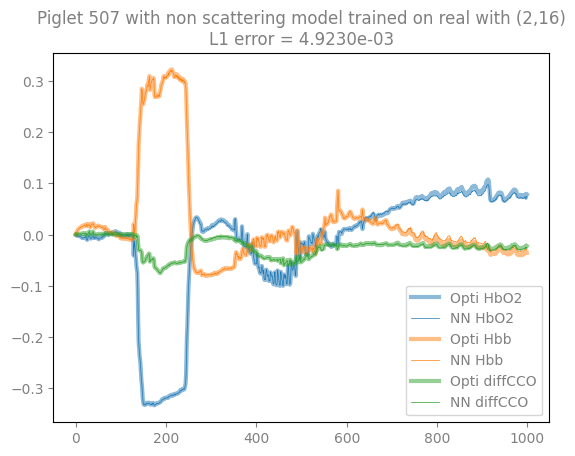

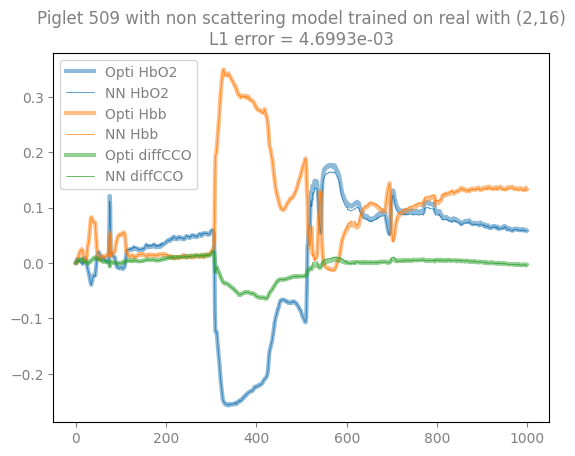

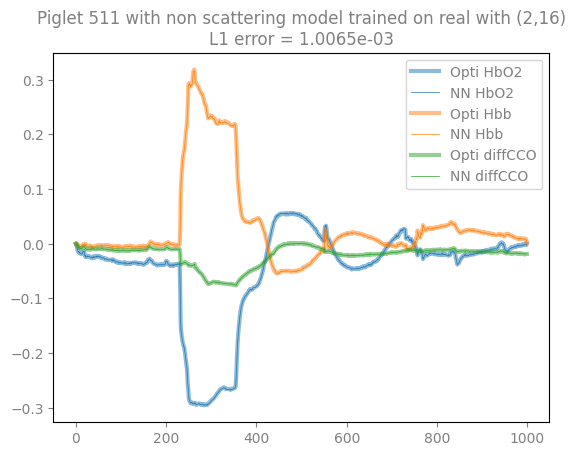

<Figure size 640x480 with 0 Axes>

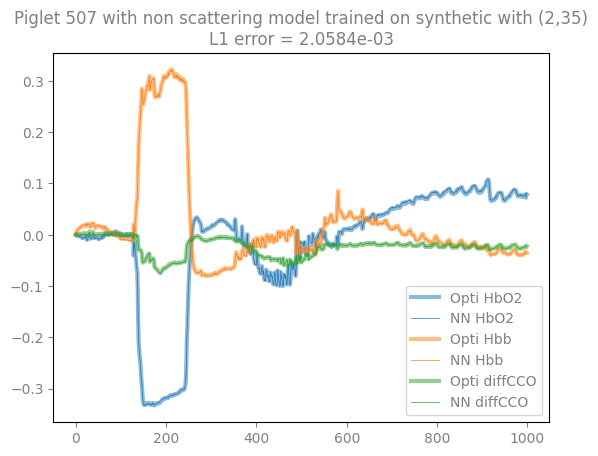

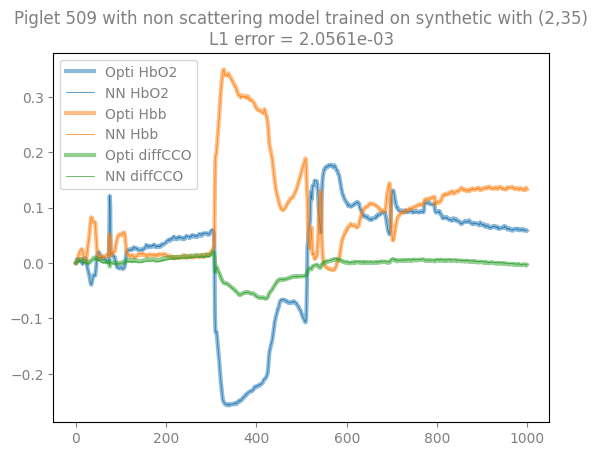

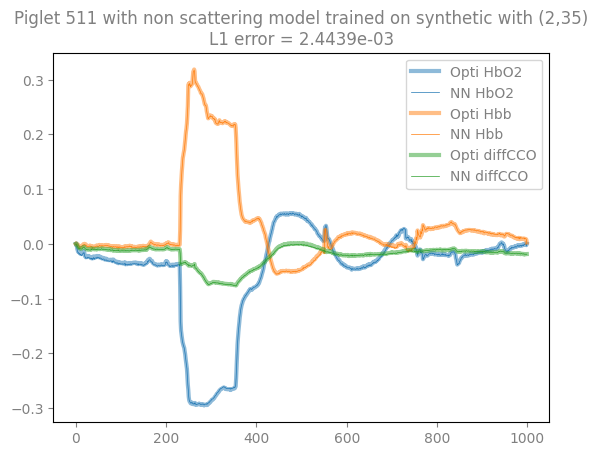

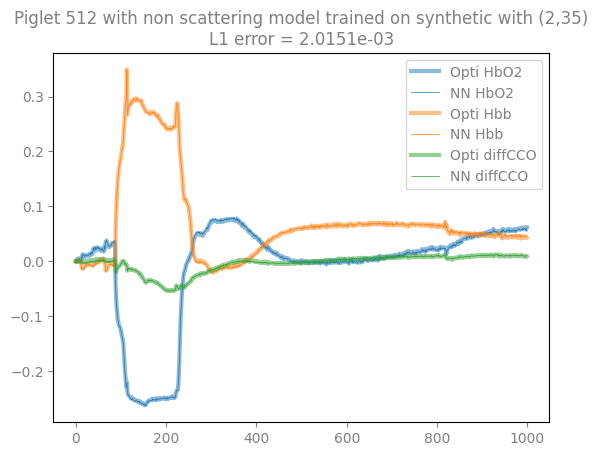

In [4]:
#%run -i 'train_piglet.py'
#from train_piglet import train_piglet
from evaluate_test_set import run_test_set
from train_piglet import train_raytune_piglet
import pickle
cumulative_errors = []

#scattering_values = [False, True]
#scattering_values = [True]
scattering_values = [False]

synthetic_train_values = [False, True]
#scattering_values = [True]
#synthetic_train_values = [True]

#model_linearity = [False, True]
#scattering_values = [True]
#synthetic_train_values = [False]
#model_linearity = [False, True]



for scattering_value in scattering_values:
    for synthetic_train_value in synthetic_train_values:
        analysis = tune.run(
            train_raytune_piglet,
            resources_per_trial={"gpu": 0.05},
            config={
                "scattering_model": scattering_value,
                "train_on_synthetic": synthetic_train_value,
                "save_model": False,
                "lr": tune.loguniform(1e-4, 1e-1),
                "batch_size": tune.choice([32, 64, 128, 256]),
                #"n_layers": tune.qrandint(0,8),
                "n_layers": tune.qrandint(0,3),
                "layer_width": tune.sample_from(lambda spec: 0 if spec.config.n_layers == 0 else np.random.randint(1,64)),
                #"act": torch.nn.ELU if linear_model else tune.choice([torch.nn.ELU, torch.nn.Hardshrink, torch.nn.LeakyReLU])
                "act": tune.choice([torch.nn.ELU, torch.nn.Hardshrink, torch.nn.LeakyReLU])
            },
            num_samples=200
            #num_samples=80  # Number of times to sample from the hyperparameter space
            #num_samples=1
        )
        best = analysis.get_best_config(metric="loss",mode="min")
        best["save_model"] = True
        train_raytune_piglet(best)
        cumulative_error = run_test_set(best)
        cumulative_errors.append(best)
    
        # if not config.scattering_model and config.train_on_synthetic:
        #     cumulative_errors_no_scatter_synthetic.append(cumulative_error)
        # elif not config.scattering_model and not config.train_on_synthetic:
        #     cumulative_errors_no_scatter_real.append(cumulative_error)
        # elif config.scattering_model and config.train_on_synthetic:
        #     cumulative_errors_scatter_synthetic.append(cumulative_error)
        # elif config.scattering_model and not config.train_on_synthetic:
        #     cumulative_errors_scatter_real.append(cumulative_error)
        # else:
        #     error("Fatal error")

print(cumulative_errors)

# Deprecated code

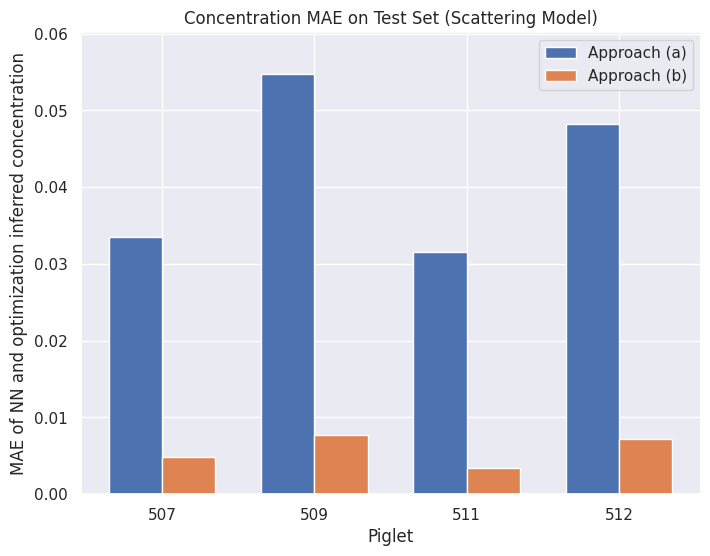

In [13]:
error_scatter_trainreal = cumulative_errors[2]['error_test_set']
error_scatter_trainsynth = cumulative_errors[3]['error_test_set']

labels = ['507', '509', '511', '512']

y_max = max(error_scatter_trainreal + error_scatter_trainsynth)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.bar(x - width/2, error_scatter_trainsynth, width, label='Approach (a)')
ax.bar(x + width/2, error_scatter_trainreal, width, label='Approach (b)')

ax.set_title('Concentration MAE on Test Set (Scattering Model)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.set_xlabel("Piglet")
ax.set_ylabel("MAE of NN and optimization inferred concentration")
ax.set_ylim(0, y_max*1.1)
plt.show()

In [5]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Data
# labels = ['Approach (a)', 'Approach (b)']
# # approach_a_no_scatter = [cumulative_errors[3]['cumulative_error'], cumulative_errors[2]['cumulative_error']]
# # approach_b_no_scatter = [cumulative_errors[1]['cumulative_error'],cumulative_errors[0]['cumulative_error']]

# linear_NN_no_scatter = [cumulative_errors[3]['cumulative_error'],cumulative_errors[1]['cumulative_error']]
# nonlinear_NN_no_scatter = [cumulative_errors[2]['cumulative_error'],cumulative_errors[0]['cumulative_error']]

# linear_NN_scatter = [cumulative_errors[7]['cumulative_error'], cumulative_errors[5]['cumulative_error']]
# nonlinear_NN_scatter = [cumulative_errors[6]['cumulative_error'], cumulative_errors[4]['cumulative_error']]

# y_max = max(linear_NN_no_scatter + nonlinear_NN_no_scatter + linear_NN_scatter + nonlinear_NN_scatter)

# x = np.arange(len(labels))
# width = 0.35

# fig, ax = plt.subplots(1,2,figsize=(16,6))

# rects1 = ax[0].bar(x - width/2, linear_NN_no_scatter, width, label='Linear NN')
# rects2 = ax[0].bar(x + width/2, nonlinear_NN_no_scatter, width, label='Nonlinear NN')

# ax[0].set_title('Mean Test Error for Non-Scattering Model')
# ax[0].set_xticks(x)
# ax[0].set_xticklabels(labels)
# ax[0].legend()

# rects1 = ax[1].bar(x - width/2, linear_NN_scatter, width, label='Linear NN')
# rects2 = ax[1].bar(x + width/2, nonlinear_NN_scatter, width, label='Nonlinear NN')

# ax[1].set_title('Mean Test Error for Scattering Model')
# ax[1].set_xticks(x)
# ax[1].set_xticklabels(labels)
# ax[1].legend()

# #ax[0].set_yscale('log')
# #ax[1].set_yscale('log')

# ax[0].set_ylim(0, y_max*1.1)
# ax[1].set_ylim(0, y_max*1.1)

# plt.show()

IndexError: list index out of range

In [10]:
# plt.figure()
# plt.plot([0,1,2,3,4], cumulative_errors_no_scatter_synthetic, label="No Scatter / Trained on Synthetic")
# plt.plot([0,1,2,3,4], cumulative_errors_no_scatter_real, label="No Scatter / Trained on Real")
# plt.plot([0,1,2,3,4], cumulative_errors_scatter_synthetic, label="Scatter / Trained on Synthetic")
# plt.plot([0,1,2,3,4], cumulative_errors_scatter_real, label="Scatter / Trained on Real")
# plt.legend()
# #plt.yscale("log")

## Timings (Attenuation -> Concentration)

In [45]:
from scipy.linalg import pinv
import time
import timeit
from evaluate_test_set import run_data_with_timings
from optimisation import optimisation_scattering_timing

def call_opti_timing(attenuation_k):
    def fun_call():
        return optimisation_scattering_timing(attenuation_k)
    return fun_call

run = True
numb_runs = 1

def get_attenuations(spectra, params, k):
    n, m = spectra.shape    
    if k > n:      
        return (np.tile(spectra, ((k // n) + 1, 1))[:k, :],np.tile(params, ((k // n) + 1, 1))[:k, :])
    elif k <= n:
        return (spectra[:k, :], params[:k, :])

def pinv_comp(M_pinv,attenuation_k):
    def f():
        return M_pinv @ attenuation_k
    return f

m = config.molecule_count  # number of parameters (from 2 to 6)
molecules, x = preprocessing.read_molecules(config.left_cut, config.right_cut, wavelengths)
y_hbo2_f, y_hb_f, y_coxa, y_creda, _, _, y_cytoa_diff, _, _, _, _ = molecules

M = np.transpose(np.vstack((np.asarray(y_hbo2_f),
                            np.asarray(y_hb_f),
                            np.asarray(y_coxa - y_creda))))
print(M.shape)
M_pinv = pinv(M)

train_set = PigletDataset(config.dataset_path+"piglet_no_scattering", range=(475, 475))
params = train_set.params.numpy()
attenuations = train_set.spectra.numpy()
assert(np.all(M_pinv @ np.transpose(attenuations) == np.transpose(params)) == True) 

print(attenuations.shape)
print(params.shape)
print(M_pinv.shape)

ns = np.around(np.logspace(np.log10(10**1), np.log10(10**5), 10)).astype(int)
#ns = np.around(np.logspace(np.log10(10**2), np.log10(10**4), 2)).astype(int)
#ns = [10**4]
#ns = [10,50,100,500,1000,5000,10000]
runtime_linear = []
runtime_nn_cpu = []
runtime_nn_gpu = []
runtime_opti = []

with open('./results/scatter_train_real_7_34/params.pkl', 'rb') as params_file:
    hyperparams = pickle.load(params_file)

for k in tqdm(ns):
    attenuation_k, params_k = get_attenuations(attenuations,params,k)
    if run:
        runtime_linear.append(timeit.timeit(pinv_comp(M_pinv, np.transpose(attenuation_k)),number=numb_runs)/numb_runs)
        runtime_nn_cpu.append(run_data_with_timings(hyperparams, attenuation_k, params_k, numb_runs, False))
        runtime_nn_gpu.append(run_data_with_timings(hyperparams, attenuation_k, params_k, numb_runs, True))
        runtime_opti.append(timeit.timeit(call_opti_timing(attenuation_k),number=1))
        

#check that we actually did the right computation
#print(runtime_linear)
#print(runtime_nn)
#attenuation_k, params_k = get_attenuations(attenuations,params, 1000)

#timeit.timeit(call_opti_timing(attenuation_k),number=1)
#optimisation_scattering_timing(attenuation_k)


#attenuation_k, params_k = get_attenuations(attenuations,params, 1500)
#print(run_data_with_timings(hyperparams, attenuation_k, params_k, numb_runs))

# plt.plot(train_set.params.numpy()[:,0])
# plt.plot(train_set.params.numpy()[:,1])
# plt.plot(train_set.params.numpy()[:,2])
# plt.xlim([6000,7000])

(244, 3)
(1000, 244)
(1000, 3)
(3, 244)


  0%|          | 0/10 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

/home/kevinscibilia/Documents/Masterarbeit/idp-beerinverse
./dataset/piglet_scattering


  0%|          | 0/1 [00:00<?, ?it/s]

[0.00033536600039951736, 0.0004389710002214997, 0.0005182579998290748, 0.000800889999482024, 0.0017509460003566346, 0.029984827000589576, 0.004795050000211631, 0.01230221999958303, 0.030295352999928582, 0.06166341399966768]
[0.0004616530004568631, 0.0005019909995098715, 0.0009204419993693591, 0.0007248860001709545, 0.001249597999958496, 0.0015837780001675128, 0.002203650999945239, 0.0008336970004165778, 0.0007428099997923709, 0.0006689249994451529]


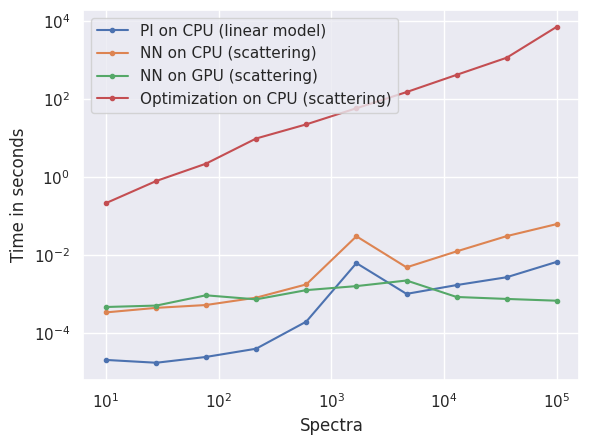

In [46]:
print(runtime_nn_cpu)
print(runtime_nn_gpu)
plt.plot(ns,runtime_linear,'.-',label='PI on CPU (linear model)')
plt.plot(ns,runtime_nn_cpu,'.-',label='NN on CPU (scattering)')
plt.plot(ns,runtime_nn_gpu,'.-',label='NN on GPU (scattering)')
plt.plot(ns,runtime_opti,'.-',label='Optimization on CPU (scattering)')
plt.xlabel("Spectra")
plt.ylabel("Time in seconds")
plt.xscale('log')
plt.yscale('log')
plt.legend(fancybox=True)

In [41]:
ns

array([    10,     28,     77,    215,    599,   1668,   4642,  12915,
        35938, 100000])